In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline
from scipy import stats

In [122]:
df = pd.read_csv(r"C:\Users\nico_\Desktop\fichiers_csv\boston.csv")

In [123]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Chaque enregistrement de la base de données décrit une banlieue ou une ville de Boston. Les données ont été tirées de la Boston Standard Metropolitan Statistical Area (SMSA) en 1970.

1) CRIM : taux de criminalité par habitant par ville
2) ZN : proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés.
3) INDUS : proportion de superficies non commerciales par ville
4) CHAS : variable fictive de Charles River (1 si la zone délimite la rivière ; 0 sinon)
5) NOX : concentration d'oxydes d'azote (parties pour 10 millions) [parties/10 M]
6) RM : nombre moyen de pièces par logement
7) AGE : proportion d'unités occupées par leur propriétaire construites avant 1940
8) DIS : distances pondérées jusqu'à cinq centres d'emploi de Boston
9) RAD : indice d'accessibilité aux autoroutes radiales.  Les valeurs plus élevées de RAD indiquent une meilleure accessibilité aux autoroutes radiales, tandis que les valeurs plus faibles indiquent une accessibilité moindre.
10) TAX : plein- valeur taux de taxe foncière par 10 000 $ [$/10 000]
11) PTRATIO : ratio élèves-enseignant par ville
12) B : Le résultat de l'équation B=1000(Bk - 0,63)^2 où Bk est la proportion de noirs par ville
13) LSTAT : % de statut inférieur de la population (indicateur du niveau socio-économique moyen des habitants d'une zone)

Variable de sortie :
1) MEDV : valeur médiane des logements occupés par leur propriétaire en 1 000 $ [k$]

In [124]:
df.shape

(506, 14)

In [125]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [126]:
df.duplicated().sum()

0

In [127]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [128]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Outliers

In [129]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

<Axes: xlabel='LSTAT'>

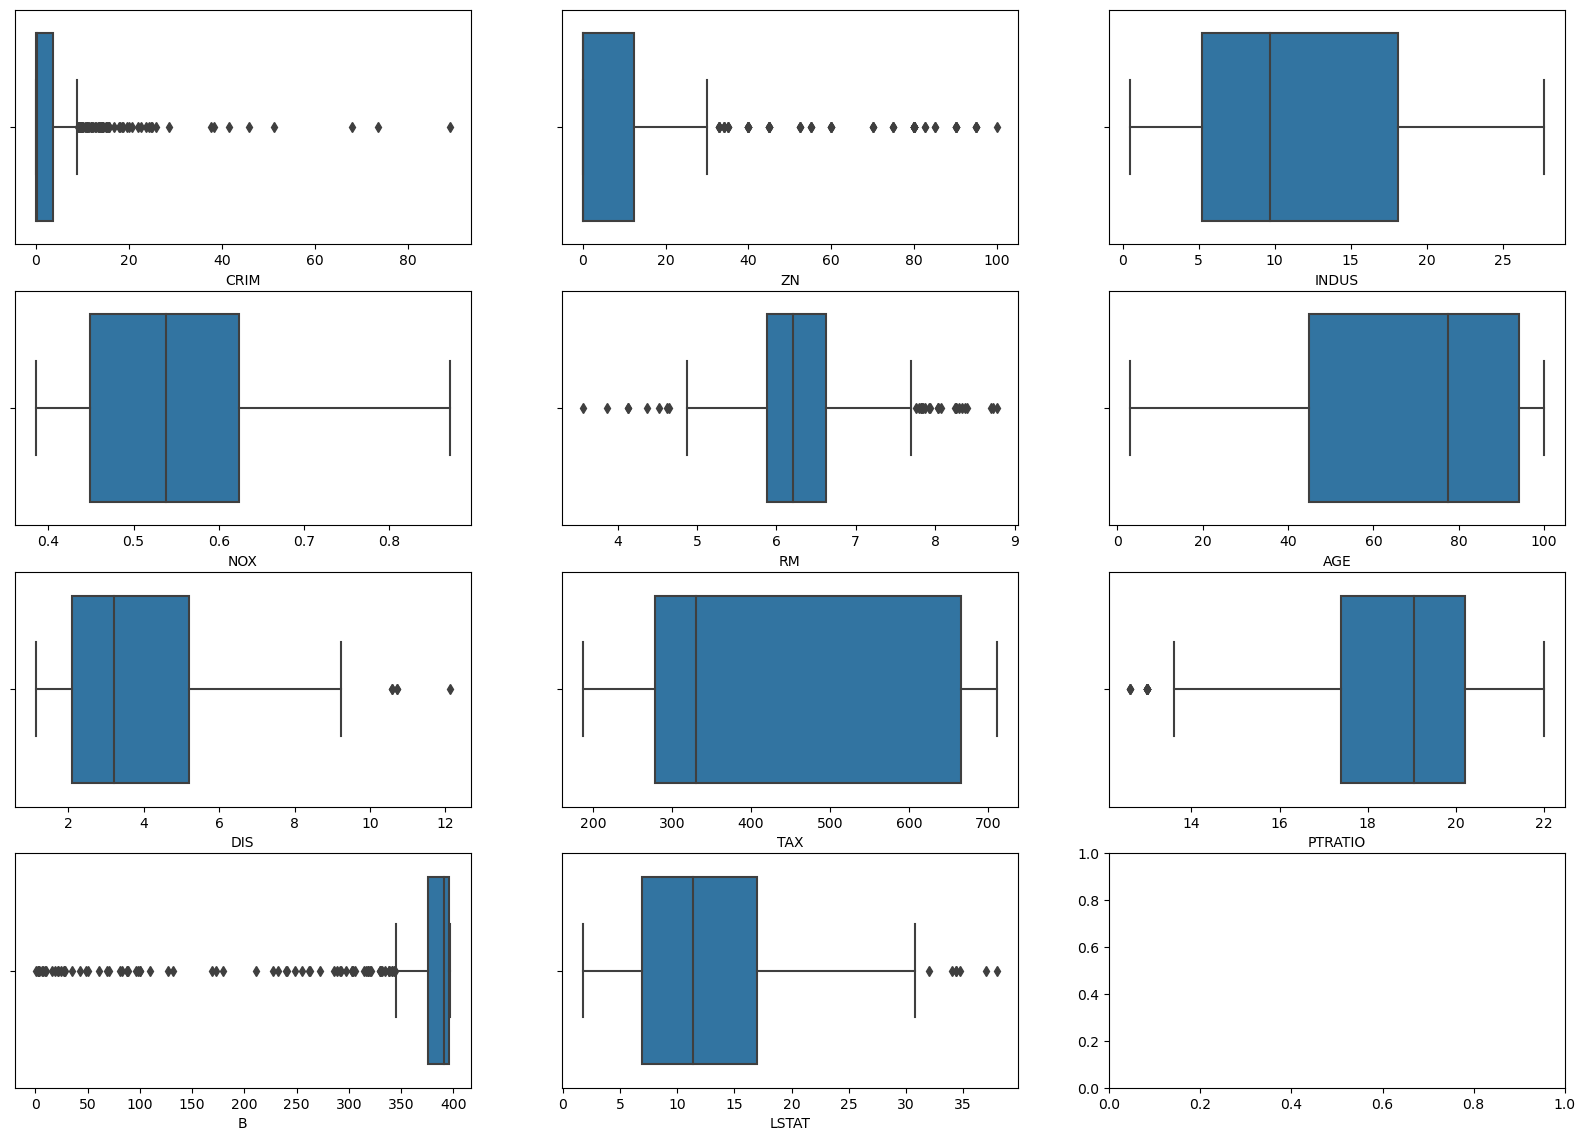

In [130]:
fig, axes = plt.subplots(4, 3, figsize=(20, 14))

sns.boxplot(ax=axes[0, 0], x=df['CRIM'])

sns.boxplot(ax=axes[0, 1], x=df['ZN'])

sns.boxplot(ax=axes[0, 2], x=df['INDUS'])

sns.boxplot(ax=axes[1, 0], x=df['NOX'])

sns.boxplot(ax=axes[1, 1], x=df['RM'])

sns.boxplot(ax=axes[1, 2], x=df['AGE'])

sns.boxplot(ax=axes[2, 0], x=df['DIS'])

sns.boxplot(ax=axes[2, 1], x=df['TAX'])

sns.boxplot(ax=axes[2, 2], x=df['PTRATIO'])

sns.boxplot(ax=axes[3, 0], x=df['B'])

sns.boxplot(ax=axes[3, 1], x=df['LSTAT'])

# Pourcentage d'outliers par variables

In [131]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


# Distribution des données

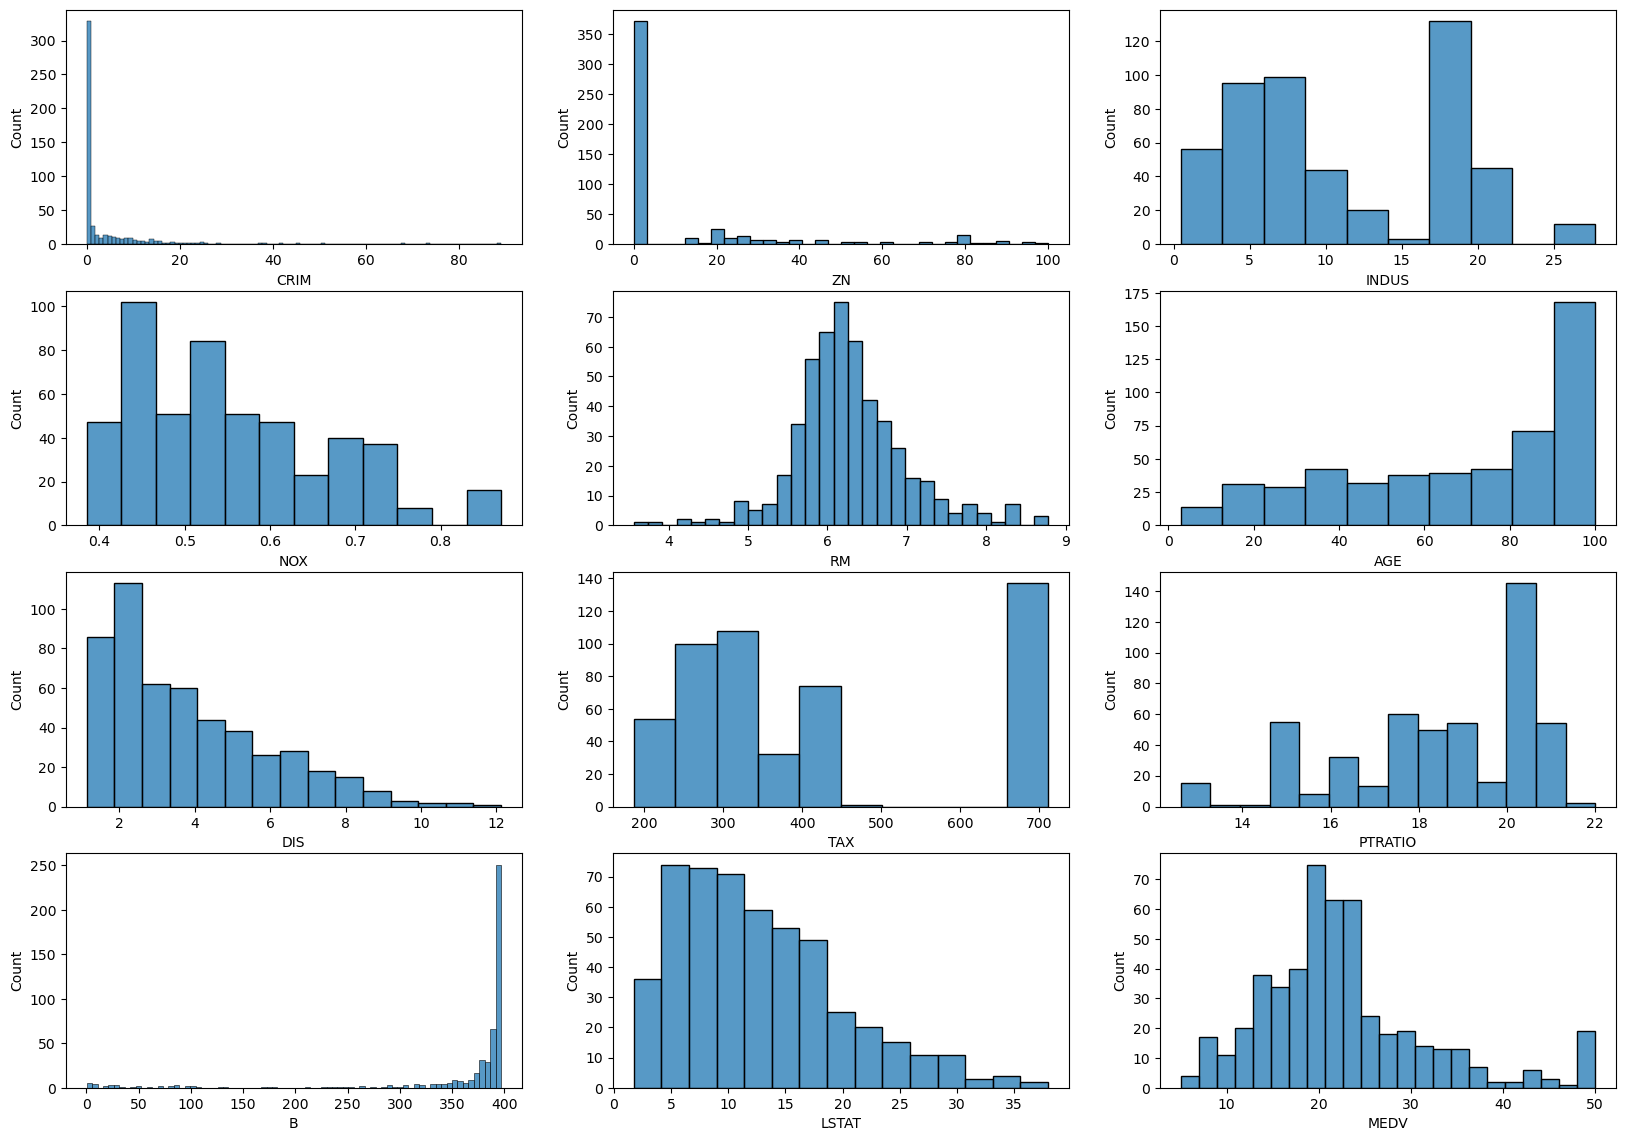

In [132]:
fig, axes = plt.subplots(4, 3, figsize=(20, 14))

sns.histplot(ax=axes[0, 0], x=df['CRIM'])
sns.histplot(ax=axes[0, 1], x=df['ZN'])
sns.histplot(ax=axes[0, 2], x=df['INDUS'])
sns.histplot(ax=axes[1, 0], x=df['NOX'])
sns.histplot(ax=axes[1, 1], x=df['RM'])
sns.histplot(ax=axes[1, 2], x=df['AGE'])
sns.histplot(ax=axes[2, 0], x=df['DIS'])
sns.histplot(ax=axes[2, 1], x=df['TAX'])
sns.histplot(ax=axes[2, 2], x=df['PTRATIO'])
sns.histplot(ax=axes[3, 0], x=df['B'])
sns.histplot(ax=axes[3, 1], x=df['LSTAT'])
sns.histplot(ax=axes[3, 2], x=df['MEDV'])

plt.show()

Les distribution des données de CRIM, ZN et B sont fortement asymétriques (skewed distribution)

# Gestion des outliers

Remplacement des outliers par les limites supérieures et inférieures

In [133]:
def replace_outliers(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df[variable] = np.where(df[variable] < lower_limit, lower_limit, df[variable])
    df[variable] = np.where(df[variable] > upper_limit, upper_limit, df[variable])

variables = ['CRIM', 'ZN', 'RM','DIS','PTRATIO','B','LSTAT']
for variable in variables:
    replace_outliers(df, variable)

Text(0.5, 1.0, 'LSTAT')

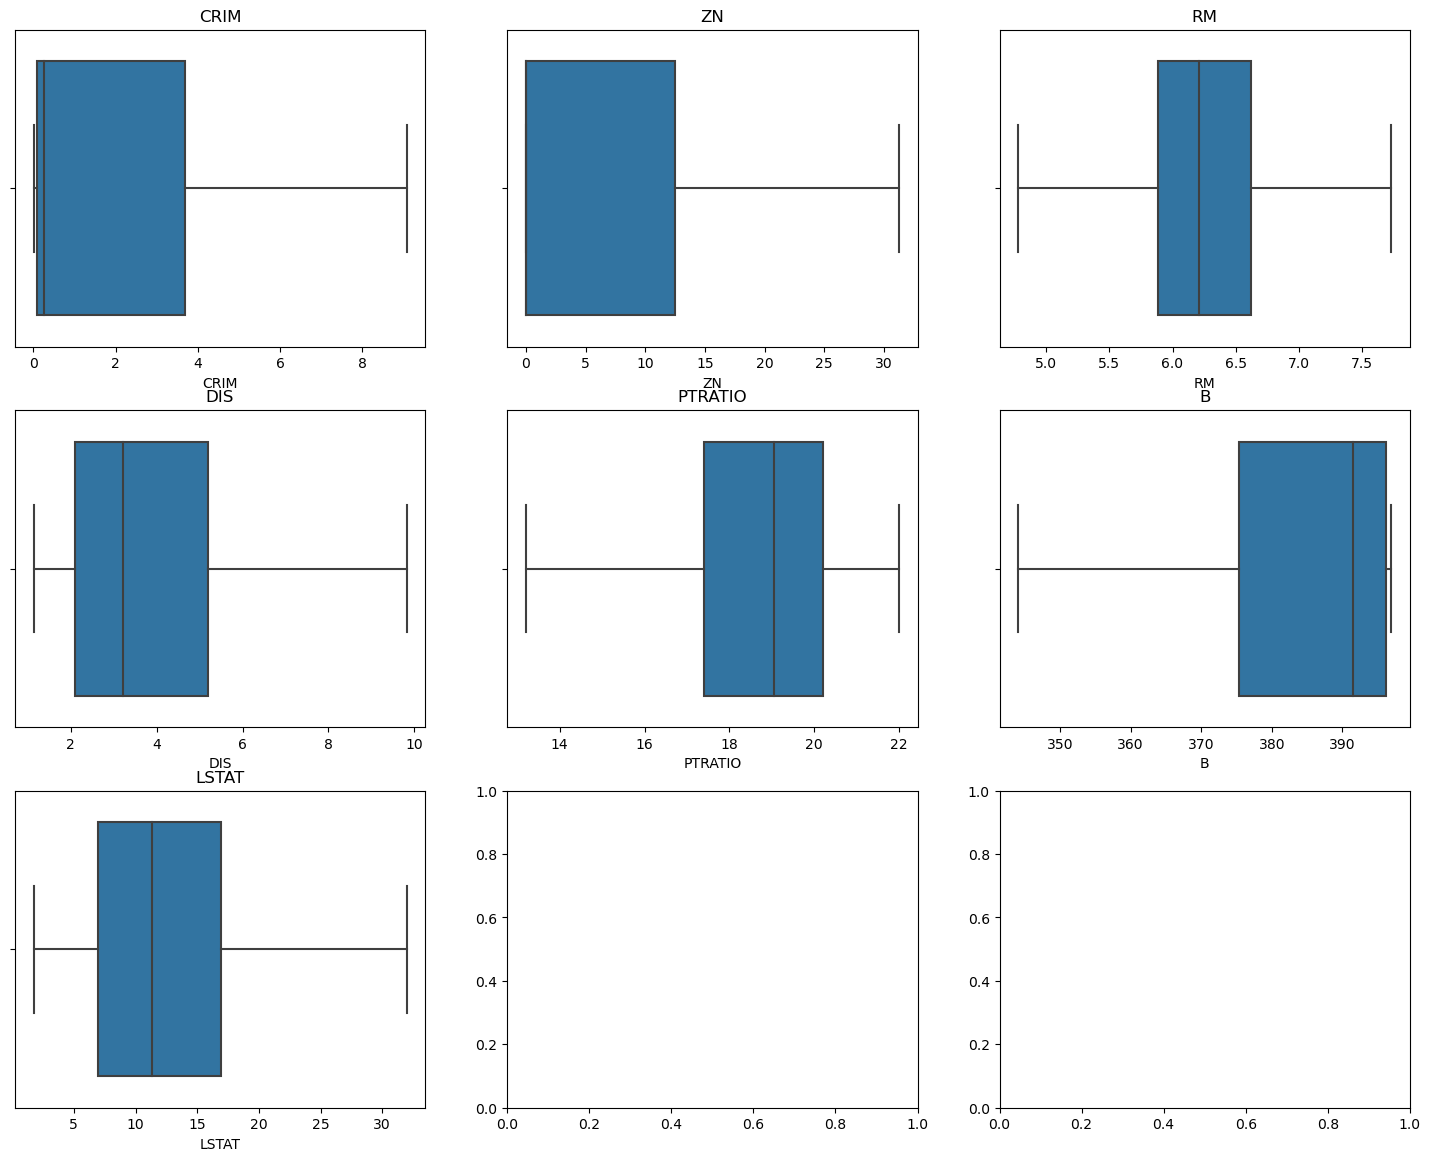

In [134]:
fig, axes = plt.subplots(3, 3, figsize=(18, 14))

sns.boxplot(ax=axes[0, 0], x=df['CRIM'])
axes[0, 0].set_title('CRIM')

sns.boxplot(ax=axes[0, 1], x=df['ZN'])
axes[0, 1].set_title('ZN')

sns.boxplot(ax=axes[0, 2], x=df['RM'])
axes[0, 2].set_title('RM')

sns.boxplot(ax=axes[1, 0], x=df['DIS'])
axes[1, 0].set_title('DIS')

sns.boxplot(ax=axes[1, 1], x=df['PTRATIO'])
axes[1, 1].set_title('PTRATIO')

sns.boxplot(ax=axes[1, 2], x=df['B'])
axes[1, 2].set_title('B')

sns.boxplot(ax=axes[2, 0], x=df['LSTAT'])
axes[2, 0].set_title('LSTAT')

# Distribution des données en fonction de MEDV

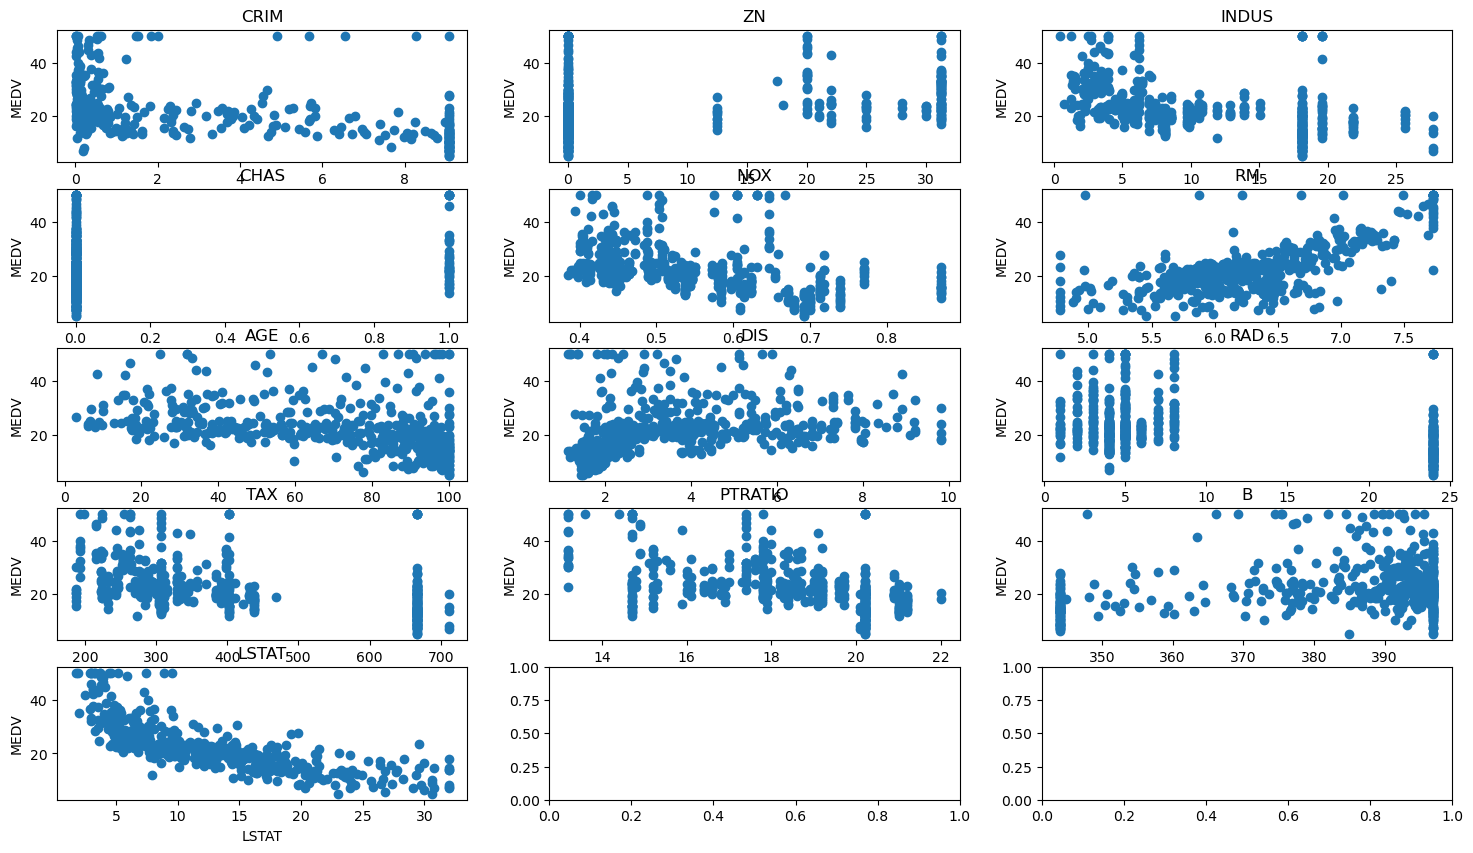

In [135]:
fig, axes = plt.subplots(5, 3, figsize=(18, 10))

features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


for i, feature in enumerate(features):
    row = i // 3  
    col = i % 3   
    
    axes[row, col].scatter(df[feature], df['MEDV'])
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('MEDV')
    
plt.show()

# Variables catégorielles

# CHAS

In [136]:
df["CHAS"].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [137]:
df.groupby("CHAS")["MEDV"].mean()

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64

<Axes: xlabel='CHAS', ylabel='MEDV'>

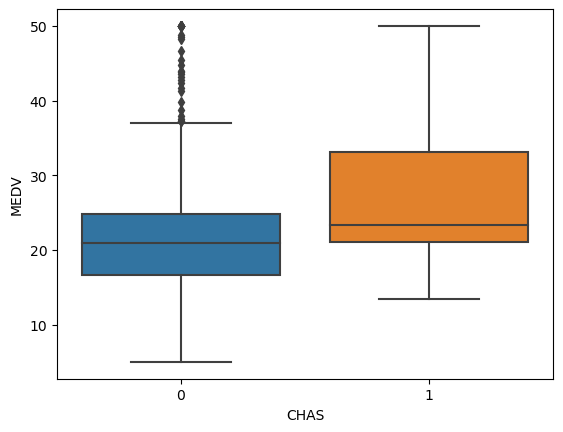

In [138]:
sns.boxplot(x="CHAS", y="MEDV", data=df)

Le prix augmente pour des maisons proches de la rivière

# Coefficient de corrélation bisériale

In [139]:
correlation_coefficient, p_value = stats.pointbiserialr(df["CHAS"], df["MEDV"])
print("Coefficient de corrélation bisériale :", correlation_coefficient)
print("Valeur p associée :", p_value)

Coefficient de corrélation bisériale : 0.17526017719029846
Valeur p associée : 7.390623170519672e-05


Corrélation positive, mais faible, entre CHAS et MEDV. La p_value de 7.390623170519672e-05 indique que la corrélation observée est statistiquement significative mais faible.

# RAD

In [140]:
df["RAD"].value_counts()

RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

In [141]:
df.groupby("RAD")["MEDV"].mean()

RAD
1     24.365000
2     26.833333
3     27.928947
4     21.387273
5     25.706957
6     20.976923
7     27.105882
8     30.358333
24    16.403788
Name: MEDV, dtype: float64

<Axes: xlabel='RAD', ylabel='MEDV'>

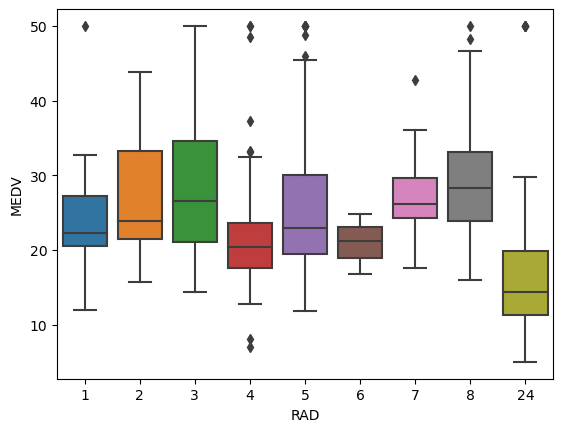

In [142]:
sns.boxplot(x="RAD", y="MEDV", data=df)

L'indice d'accessibilité aux autoroutes n'influe pas sur le prix

# Corrélation de rang de Spearman

In [143]:
spearman_corr, _ = spearmanr(df['RAD'], df['MEDV'])
spearman_corr

-0.3467762570566875

Le coefficient de -0,35 suggère une relation monotone négative modérée entre les variables. Cela signifie que lorsque les valeurs de la variable RAD augmentent, les valeurs correspondantes de la variable MEDV ont tendance à diminuer, et vice versa

# Répartition des données et droite de régression

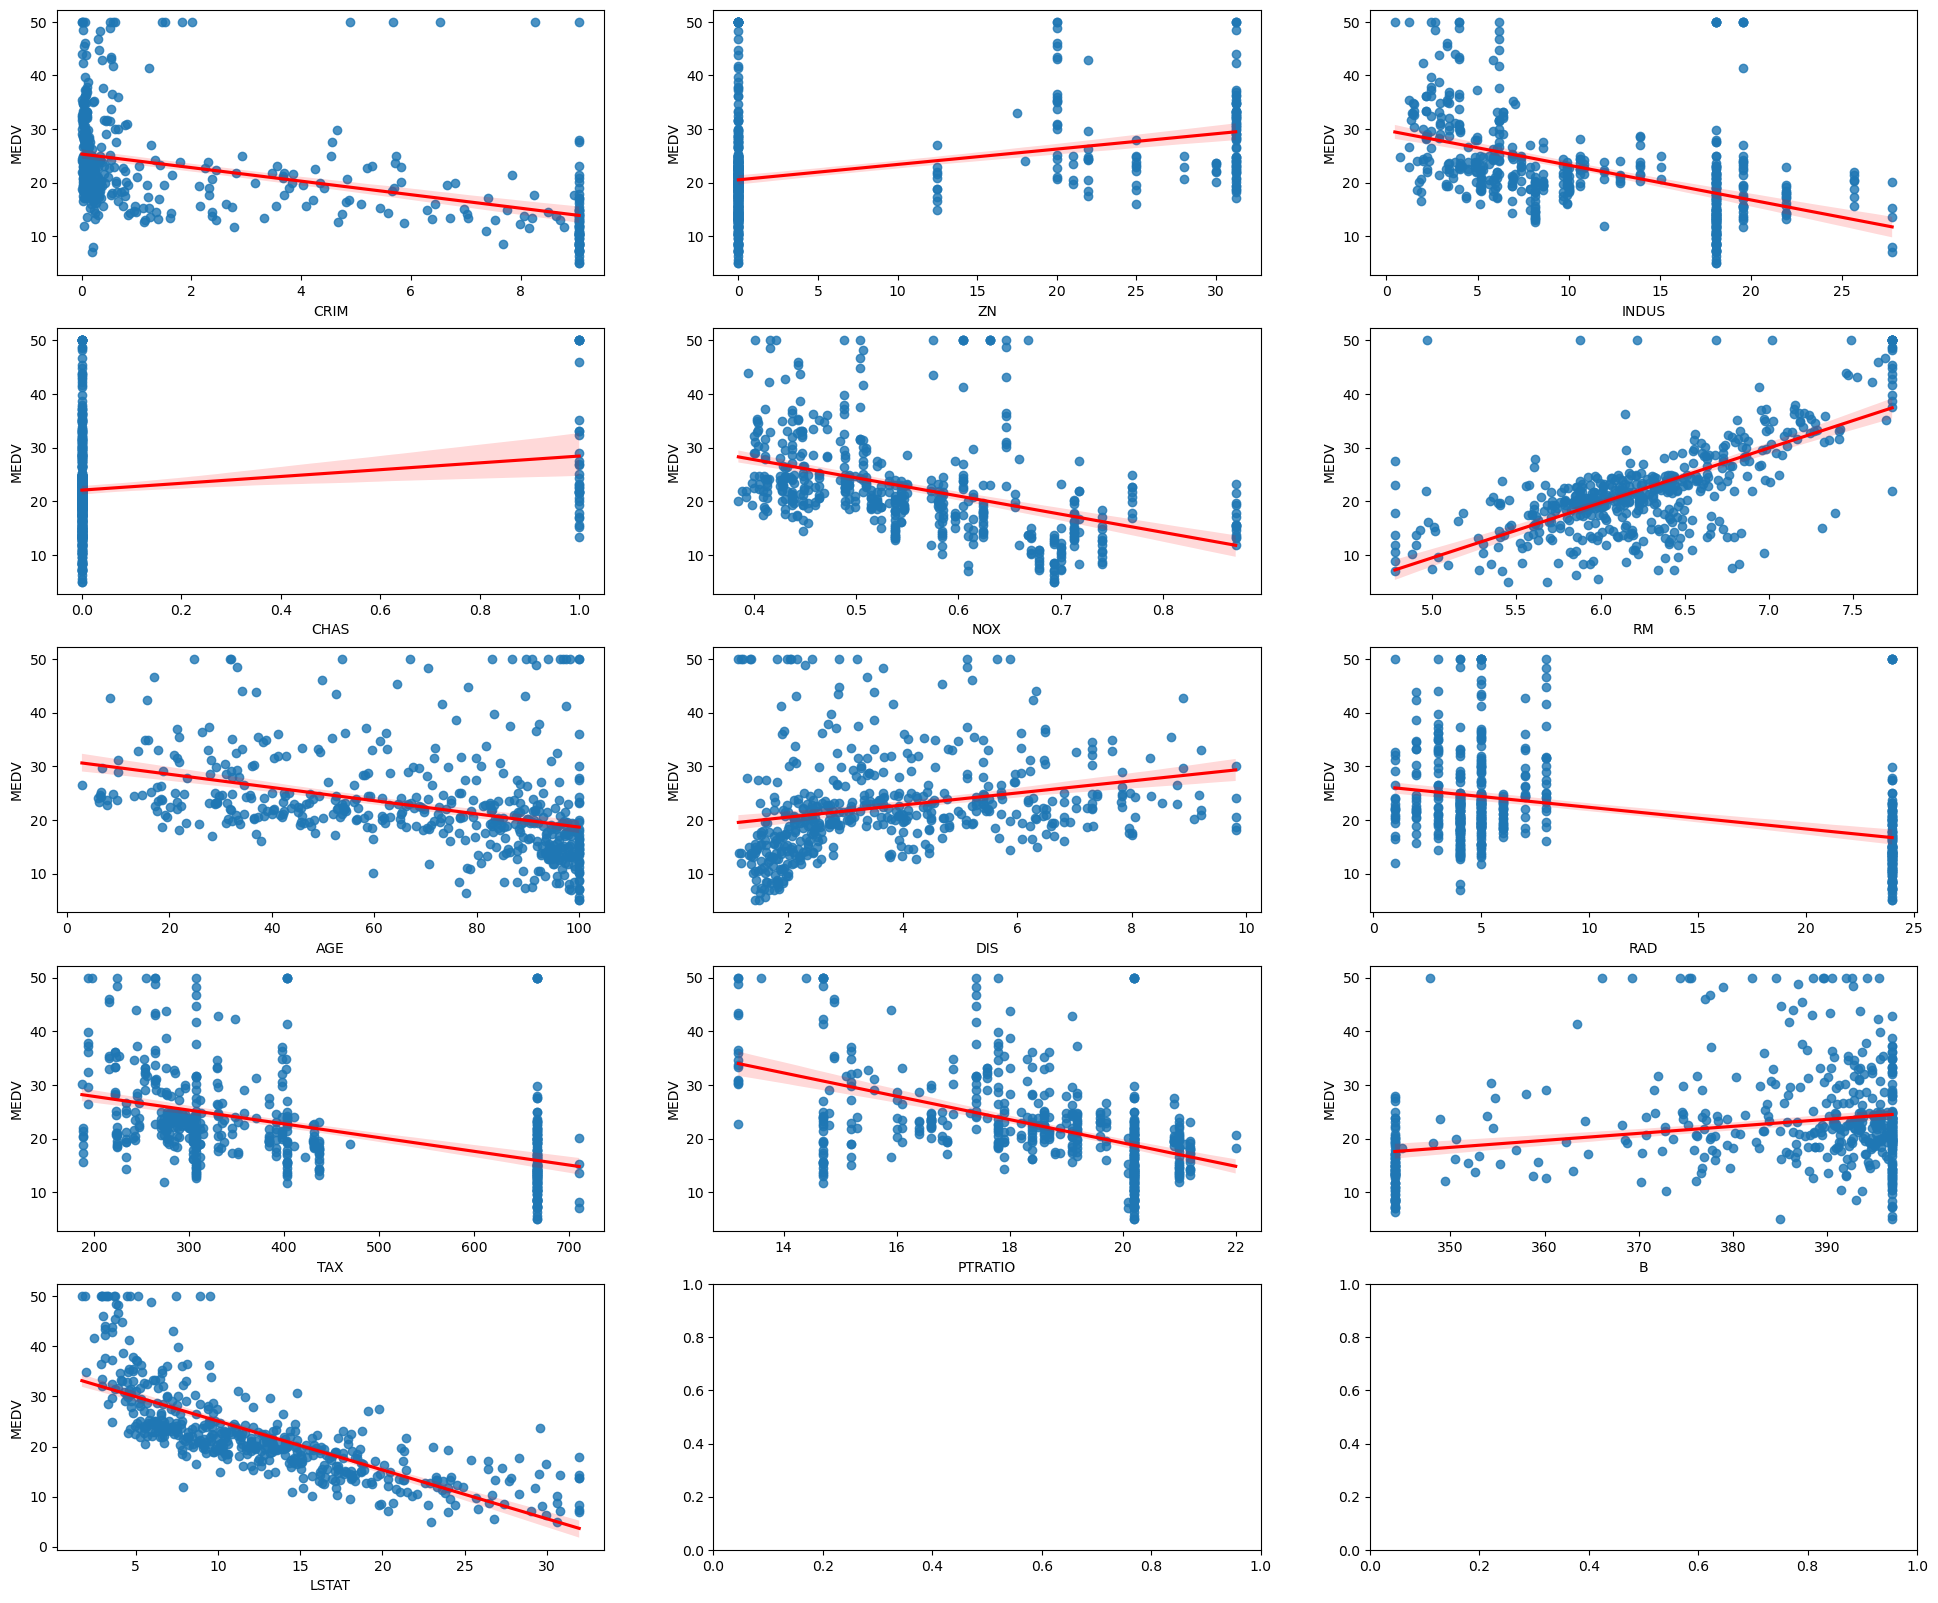

In [144]:
fig, axes = plt.subplots(5, 3, figsize=(24, 20))

sns.regplot(ax=axes[0, 0], x='CRIM', y='MEDV', data=df, line_kws={"color": "red"})
axes[0, 0].set_xlabel('CRIM')

sns.regplot(ax=axes[0, 1], x='ZN', y='MEDV', data=df, line_kws={"color": "red"})
axes[0, 1].set_xlabel('ZN')

sns.regplot(ax=axes[0, 2], x='INDUS', y='MEDV', data=df, line_kws={"color": "red"})
axes[0, 2].set_xlabel('INDUS')

sns.regplot(ax=axes[1, 0], x='CHAS', y='MEDV', data=df, line_kws={"color": "red"})
axes[1, 0].set_xlabel('CHAS')

sns.regplot(ax=axes[1, 1], x='NOX', y='MEDV', data=df, line_kws={"color": "red"})
axes[1, 1].set_xlabel('NOX')

sns.regplot(ax=axes[1, 2], x='RM', y='MEDV', data=df, line_kws={"color": "red"})
axes[1, 2].set_xlabel('RM')

sns.regplot(ax=axes[2, 0], x='AGE', y='MEDV', data=df, line_kws={"color": "red"})
axes[2, 0].set_xlabel('AGE')

sns.regplot(ax=axes[2, 1], x='DIS', y='MEDV', data=df, line_kws={"color": "red"})
axes[2, 1].set_xlabel('DIS')

sns.regplot(ax=axes[2, 2], x='RAD', y='MEDV', data=df, line_kws={"color": "red"})
axes[2, 2].set_xlabel('RAD')

sns.regplot(ax=axes[3, 0], x='TAX', y='MEDV', data=df, line_kws={"color": "red"})
axes[3, 0].set_xlabel('TAX')

sns.regplot(ax=axes[3, 1], x='PTRATIO', y='MEDV', data=df, line_kws={"color": "red"})
axes[3, 1].set_xlabel('PTRATIO')

sns.regplot(ax=axes[3, 2], x='B', y='MEDV', data=df, line_kws={"color": "red"})
axes[3, 2].set_xlabel('B')

sns.regplot(ax=axes[4, 0], x='LSTAT', y='MEDV', data=df, line_kws={"color": "red"})
axes[4, 0].set_xlabel('LSTAT')

plt.show()

# Corrélation de Pearson

<Axes: >

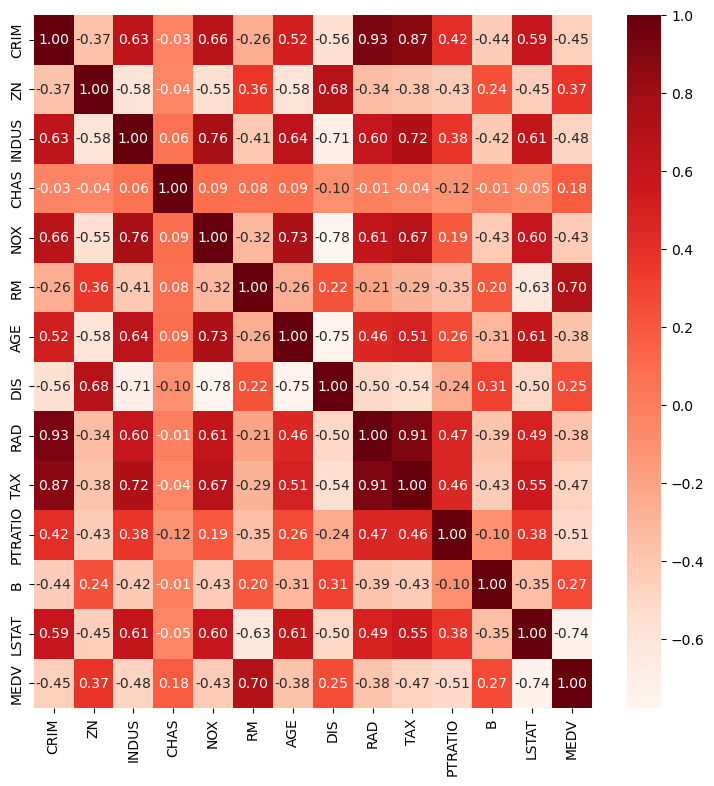

In [145]:
plt.figure(figsize=(9,9))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, fmt='.2f')

In [146]:
from scipy import stats

features = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
for i in features:
    pearson_coef, p_value = stats.pearsonr(df[i],df["MEDV"])
    print(i, ":")
    print("pearson_coef = ", pearson_coef)
    print("p_value = ", p_value)

CRIM :
pearson_coef =  -0.45449457749074507
p_value =  3.686047692286082e-27
ZN :
pearson_coef =  0.37469076401982815
p_value =  2.6019266633230564e-18
INDUS :
pearson_coef =  -0.4837251600283729
p_value =  4.9002599817523505e-31
NOX :
pearson_coef =  -0.4273207723732826
p_value =  7.06504158625371e-24
RM :
pearson_coef =  0.7017246727922378
p_value =  3.098362270602297e-76
AGE :
pearson_coef =  -0.37695456500459623
p_value =  1.5699822091881075e-18
DIS :
pearson_coef =  0.25317162895826795
p_value =  7.685262165017298e-09
TAX :
pearson_coef =  -0.4685359335677671
p_value =  5.637733627690444e-29
PTRATIO :
pearson_coef =  -0.5071875940082526
p_value =  1.9807530706255997e-34
B :
pearson_coef =  0.2710670602421803
p_value =  5.687653434295558e-10
LSTAT :
pearson_coef =  -0.7441115165220014
p_value =  2.4192447233049503e-90


CRIM : Il y a une corrélation négative modérée avec MEDV, ce qui signifie que les quartiers avec un taux de criminalité plus élevé ont tendance à avoir des prix médians de logements plus bas.

ZN : Il y a une corrélation positive modérée avec MEDV, indiquant que les zones résidentielles plus grandes (ZN) ont tendance à avoir des prix médians de logements plus élevés.

INDUS : Une corrélation négative modérée suggère que les quartiers avec une proportion industrielle plus élevée ont tendance à avoir des prix médians de logements plus bas.

NOX : Une corrélation négative modérée suggère que les concentrations plus élevées d'oxyde d'azote sont associées à des prix médians de logements plus bas.

RM : Une corrélation positive forte indique que le nombre moyen de chambres par logement est fortement associé à des prix médians de logements plus élevés.

AGE : Une corrélation négative modérée suggère que les quartiers avec une proportion plus élevée de logements occupés par leur propriétaire construits avant 1940 ont tendance à avoir des prix médians de logements plus bas.

DIS : Une corrélation positive modérée suggère que les quartiers avec des distances plus courtes aux centres d'emploi de Boston ont tendance à avoir des prix médians de logements plus élevés.

TAX : Une corrélation négative modérée suggère que les quartiers avec des taux d'imposition foncière plus élevés ont tendance à avoir des prix médians de logements plus bas.

PTRATIO : Une corrélation négative modérée indique que les quartiers avec des ratios élève / enseignant plus élevés ont tendance à avoir des prix médians de logements plus bas.

B : Une corrélation positive modérée indique que les quartiers avec un pourcentage plus élevé de personnes de descendance afro-américaine ont tendance à avoir des prix médians de logements plus élevés.

LSTAT : Une corrélation négative forte suggère que les quartiers avec un pourcentage plus élevé de statut inférieur de la population ont tendance à avoir des prix médians de logements plus bas.

# Variables sélectionnées

De part leurs distributions fortement asymétriques, les variables CRIM, ZN et B ne sont pas sélectionnées.
Au vu des tests statistiques, les variables RAD et CHAZ ne sont pas sélectionnées.

Les variables comme RM et LSTAT ont des coefficients de corrélation élevés et des valeurs p très faibles, ce qui suggère une forte relation avec la variable cible 'MEDV'

Certaines variables comme INDUS, NOX, AGE, DIS, TAX et PTRATIO ont des coefficients de corrélation modérés mais des valeurs p très faibles, ce qui suggère une relation significative avec 'MEDV'

Les variables RM, LSTAT, INDUS, NOX, AGE, DIS, TAX et PTRATIO sont par conséquent sélectionnées.

# Split des données

In [286]:
df1 = df[["RM", "LSTAT", "INDUS", "NOX", "AGE", "DIS", "TAX","PTRATIO","MEDV"]]

In [287]:
X = df1.drop("MEDV", axis=1)
y = df1["MEDV"]

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformation et standardisation des données

In [289]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Regression linéaire

In [290]:
model = LinearRegression()

In [291]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [292]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [293]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [294]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

In [295]:
print(" MSE on training data :", train_mse)
print(" MSE on test data :", test_mse)

print(" RMSE on training data :", np.sqrt(train_mse))
print(" RMSE on test data :", np.sqrt(test_mse))

print(" MAE on training data :", train_mae)
print(" MAE on test data :", test_mae)

 MSE on training data : 24.42847894671635
 MSE on test data : 26.026961532411068
 RMSE on training data : 4.942517470552466
 RMSE on test data : 5.101662624322689
 MAE on training data : 3.5564782615556543
 MAE on test data : 3.8647540833301925


In [296]:
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("train score:", train_score)
print("test score:", test_score)

print("Score R² sur les données d'entraînement :", train_r2)
print("Score R² sur les données de test :", test_r2)

train score: 0.7188037089730239
test score: 0.6450890652196315
Score R² sur les données d'entraînement : 0.7188037089730239
Score R² sur les données de test : 0.6450890652196315


In [297]:
coefficients = model.coef_
coefficients

array([ 3.17675207, -4.17501407,  0.02665374, -1.69986796, -0.18301414,
       -2.75619578, -0.52780929, -2.0409611 ])

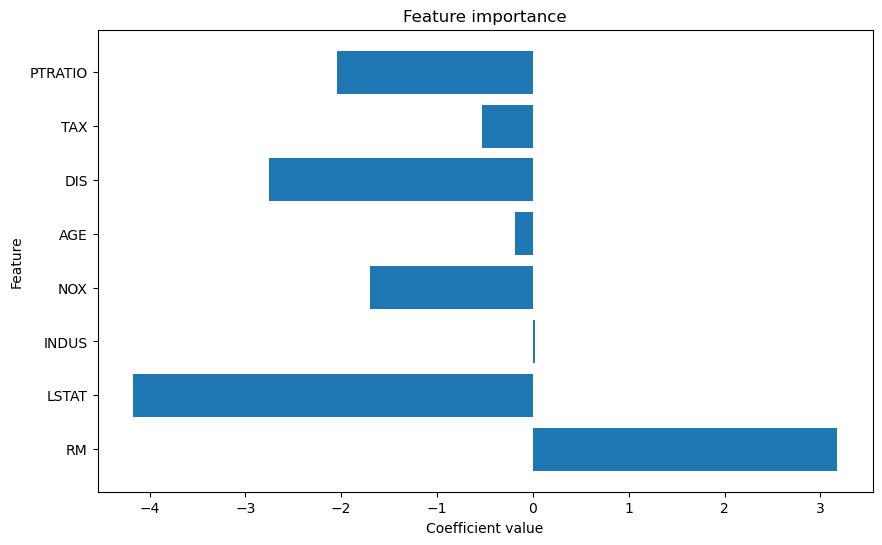

In [298]:
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient value')
plt.ylabel('Feature')
plt.title('Feature importance')
plt.show()

En fonction des coefficients, nous pouvons remarquer l'importance significative des variables LSTAT, RM, DIS, PTRATIO et NOX

In [254]:
df2 = df[["LSTAT", "RM", "DIS", "PTRATIO", "NOX","MEDV"]]
            
X = df2.drop("MEDV", axis=1)
y = df2["MEDV"]

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [256]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [257]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [258]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [260]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(" MSE on training data :", train_mse)
print(" MSE on test data :", test_mse)

print(" RMSE on training data :", np.sqrt(train_mse))
print(" RMSE on test data :", np.sqrt(test_mse))

print(" MAE on training data :", train_mae)
print(" MAE on test data :", test_mae)

train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("train score:", train_score)
print("test score:", test_score)

print("Score R² sur les données d'entraînement :", train_r2)
print("Score R² sur les données de test :", test_r2)

 MSE on training data : 24.550727867141813
 MSE on test data : 23.574029727533077
 RMSE on training data : 4.954869106963555
 RMSE on test data : 4.855309436846747
 MAE on training data : 3.572716007967626
 MAE on test data : 3.2300963083634247
train score: 0.7173965013003452
test score: 0.678537930110665
Score R² sur les données d'entraînement : 0.7173965013003452
Score R² sur les données de test : 0.678537930110665


En prenant que les variables avec les coefficients les plus important, le score R2 (0.68) est un peu plus grand que celui du modèle avec toutes les variables sélectionnées statistiquement (0.65)  

# Polynomial transformation with statistically selected features

In [275]:
X = df1.drop("MEDV", axis=1)
y = df1["MEDV"]

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [277]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'R^2 Using Test Data')

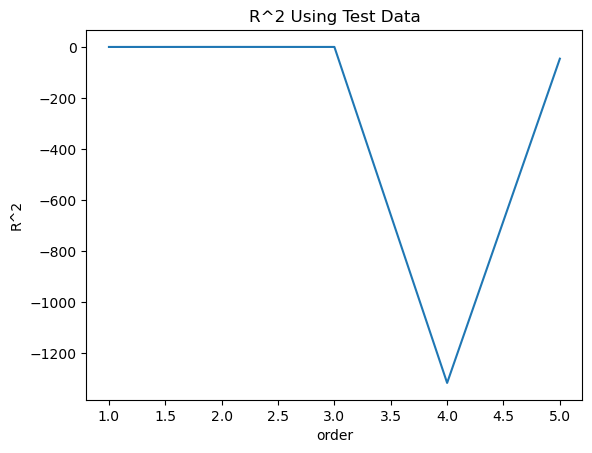

In [278]:
Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    X_train_pr = pr.fit_transform(X_train_scaled)
    X_test_pr = pr.transform(X_test_scaled)
    model.fit(X_train_pr, y_train)
    Rsqu_test.append(model.score(X_test_pr,y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Le degré 2 est le plus optimal

test score: 0.8215562908542288
train score: 0.8819372168572237


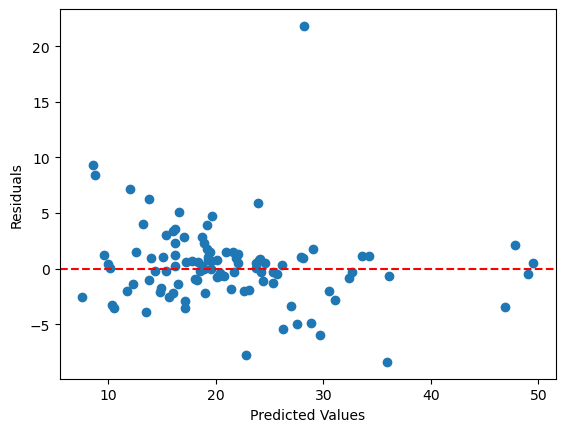

In [279]:
pr = PolynomialFeatures(degree=2)
X_train_pr = pr.fit_transform(X_train_scaled)
X_test_pr = pr.transform(X_test_scaled)
model.fit(X_train_pr,y_train)
y_pred = model.predict(X_test_pr)

print("test score:", model.score(X_test_pr, y_test))
print("train score:", model.score(X_train_pr, y_train))

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Ridge

In [280]:
from sklearn.linear_model import Ridge
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RM = Ridge(alpha=alpha) 
    RM.fit(X_train_pr, y_train)
    test_score, train_score = RM.score(X_test_pr, y_test), RM.score(X_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:07<00:00, 137.19it/s, Test Score=0.823, Train Score=0.882]


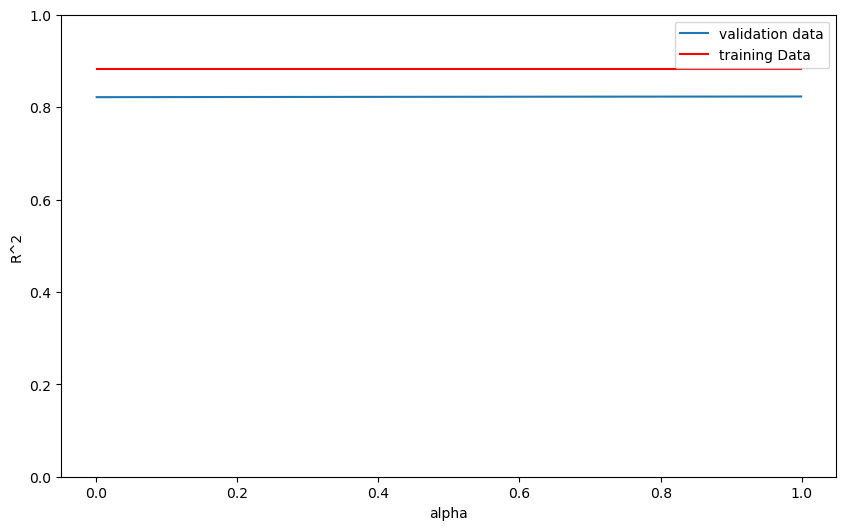

In [281]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

In [282]:
index_max = np.argmax(Rsqu_test)

alpha_optimal = Alpha[index_max]

print(f"Alpha optimal : {alpha_optimal}")

Alpha optimal : 0.999


In [284]:
RM = Ridge(alpha=1)
RM.fit(X_train_pr,y_train)
yhat = RM.predict(X_test_pr)
print(r2_score(y_test,yhat))
print("test score:", RM.score(X_test_pr, y_test))
print("train score:", RM.score(X_train_pr, y_train))

0.822978585769191
test score: 0.822978585769191
train score: 0.8818451720272897


In [285]:
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)

print('mse =', mse)
print('rmse = ', np.sqrt(mse))
print('mae =', mae)

mse = 12.981650005935856
rmse =  3.6030056905222696
mae = 2.2527110200611764


# Regression linéaire

train score :  0.7188037089730239

test score : 0.6450890652196315

# Regression linéaire avec transformation polynomiale

train score: 0.8818451720272897

test score: 0.822978585769191

# Regression Ridge avec transformation polynomiale

train score: 0.8818451720272897

test score: 0.822978585769191

# Polynomial transformation with the largest coefficients

Text(0.5, 1.0, 'R^2 Using Test Data')

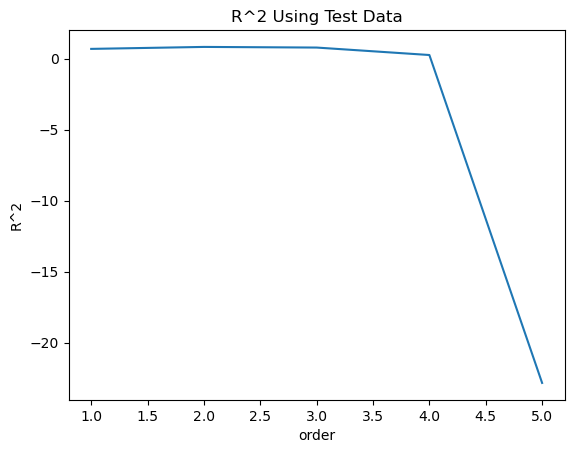

In [299]:
X = df2.drop("MEDV", axis=1)
y = df2["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    X_train_pr = pr.fit_transform(X_train_scaled)
    X_test_pr = pr.transform(X_test_scaled)
    model.fit(X_train_pr, y_train)
    Rsqu_test.append(model.score(X_test_pr,y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Le degré 2 est le plus optimal

test score: 0.8169977814527828
train score: 0.8499301800661438


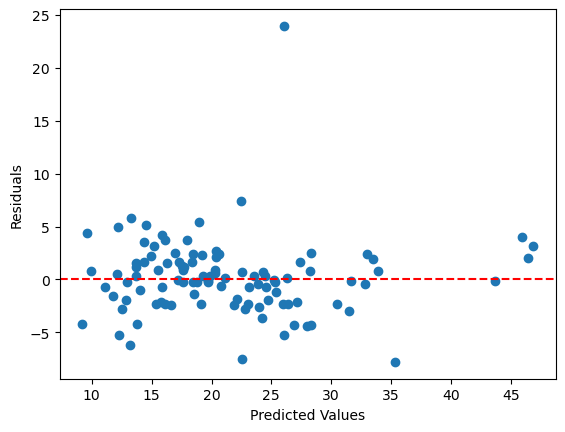

In [306]:
pr = PolynomialFeatures(degree=2)
X_train_pr = pr.fit_transform(X_train_scaled)
X_test_pr = pr.transform(X_test_scaled)
model.fit(X_train_pr,y_train)
y_pred = model.predict(X_test_pr)

print("test score:", model.score(X_test_pr, y_test))
print("train score:", model.score(X_train_pr, y_train))

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Ridge

In [313]:
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RM = Ridge(alpha=alpha) 
    RM.fit(X_train_pr, y_train)
    test_score, train_score = RM.score(X_test_pr, y_test), RM.score(X_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:07<00:00, 134.03it/s, Test Score=0.818, Train Score=0.85]


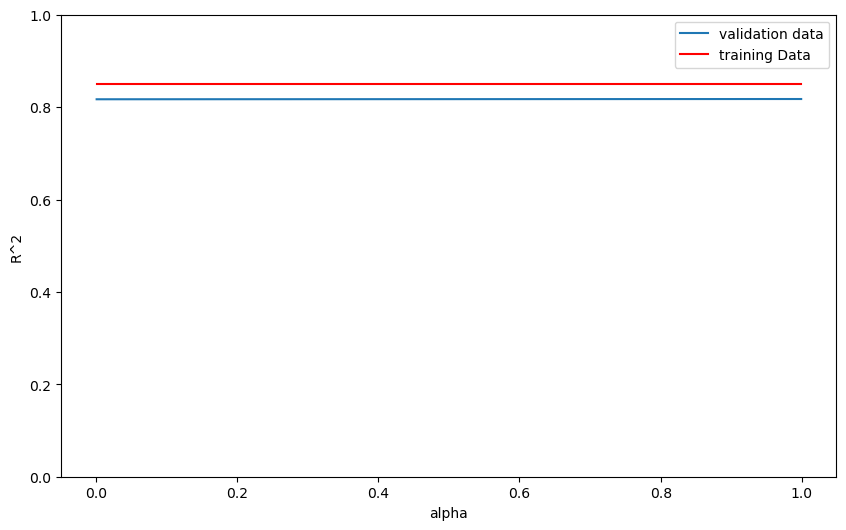

In [314]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

In [315]:
index_max = np.argmax(Rsqu_test)

alpha_optimal = Alpha[index_max]

print(f"Alpha optimal : {alpha_optimal}")

Alpha optimal : 0.999


In [316]:
RM = Ridge(alpha=1)
RM.fit(X_train_pr,y_train)
y_hat = RM.predict(X_test_pr)
print(r2_score(y_test,y_hat))
print("test score:", RM.score(X_test_pr, y_test))
print("train score:", RM.score(X_train_pr, y_train))

0.8175447316080838
test score: 0.8175447316080838
train score: 0.8499043749394006


In [182]:
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)

print('mse =', mse)
print('rmse = ', np.sqrt(mse))
print('mae =', mae)

mse = 13.380135088711308
rmse =  3.657886697084986
mae = 2.357093970134188


# Regression linéaire

train score :  0.7173965013003452

test score : 0.678537930110665

# Regression linéaire avec transformation polynomiale

train score: 0.8499301800661438

test score: 0.8169977814527828

# Regression Ridge avec transformation polynomiale

train score: 0.8499043749394006

test score: 0.8175447316080838

# Regression Linéaire et polynomiale pour chaque variable et visualisation des résidus

In [317]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [318]:
X = df[["RM", "LSTAT", "INDUS", "NOX", "AGE", "DIS", "TAX","PTRATIO"]]
y = df["MEDV"]

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# INDUS

0.2764079220817346


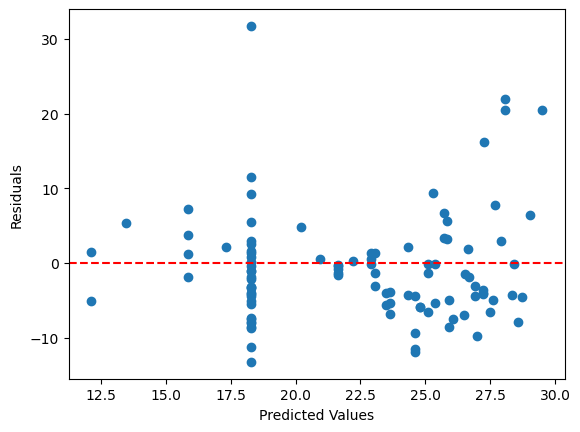

In [320]:
variable = 'INDUS'

X = X_train[[variable]]
y = y_train
model.fit(X, y)
y_pred = model.predict(X_test[[variable]])
print(r2_score(y_test,y_pred))
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Pas de relation linéaire

# Polynomial transformation

Text(0.5, 1.0, 'R^2 Using Test Data')

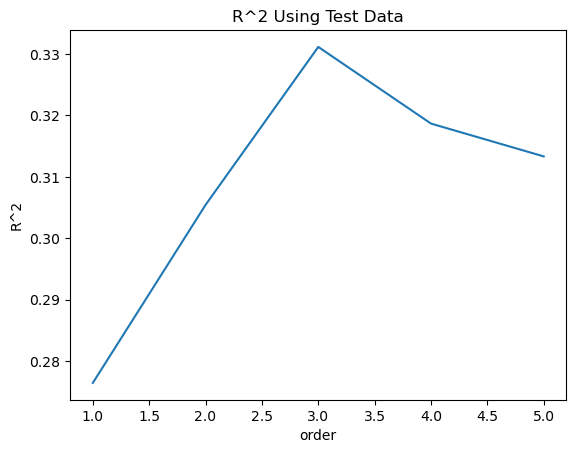

In [321]:
Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    X_train_pr = pr.fit_transform(X_train[[variable]])
    X_test_pr = pr.transform(X_test[[variable]])
    model.fit(X_train_pr, y_train)
    Rsqu_test.append(model.score(X_test_pr,y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Le degré 3 est le plus optimal

test score: 0.33117790729615626
train score: 0.26109126573304364


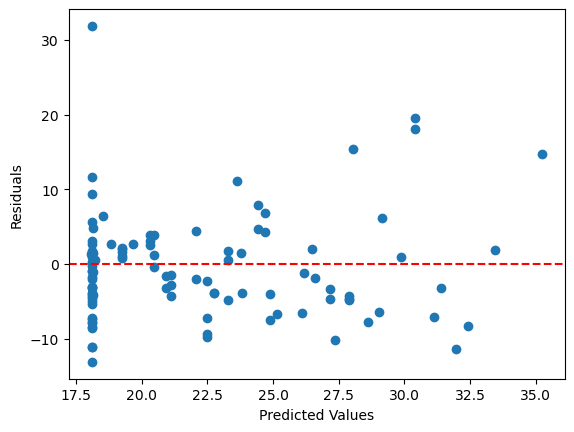

In [322]:
pr = PolynomialFeatures(degree=3)
X_train_pr = pr.fit_transform(X_train[[variable]])
X_test_pr = pr.transform(X_test[[variable]])
model.fit(X_train_pr,y_train)
y_pred = model.predict(X_test_pr)

print("test score:", model.score(X_test_pr, y_test))
print("train score:", model.score(X_train_pr, y_train))

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

<Axes: xlabel='MEDV', ylabel='Count'>

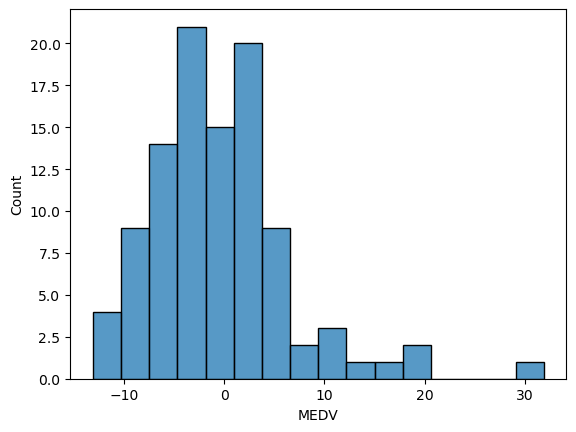

In [323]:
sns.histplot(residuals)

<Axes: ylabel='Density'>

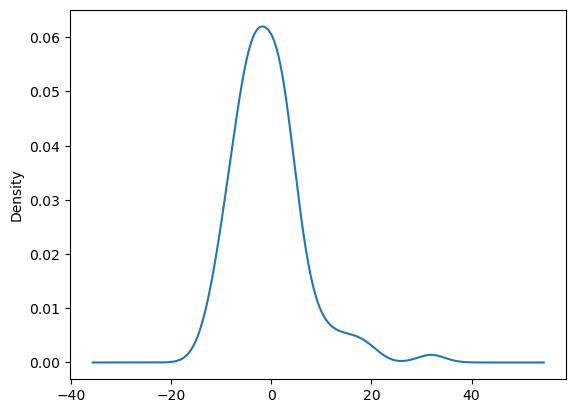

In [324]:
residuals.plot(kind="density")

Les résidus sont distribués plutôt normalement. La transformation polynomiale a aidé à capturer la non-linéarité

# NOX

0.2052049761980269


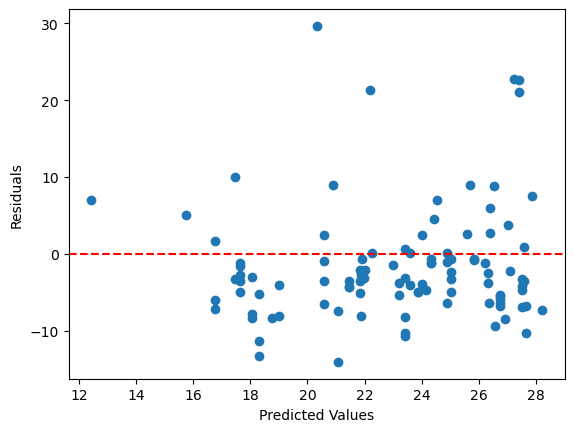

In [325]:
variable = 'NOX'

X = X_train[[variable]]
y = y_train
model.fit(X, y)
y_pred = model.predict(X_test[[variable]])
print(r2_score(y_test,y_pred))
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Polynomial tansformation

Text(0.5, 1.0, 'R^2 Using Test Data')

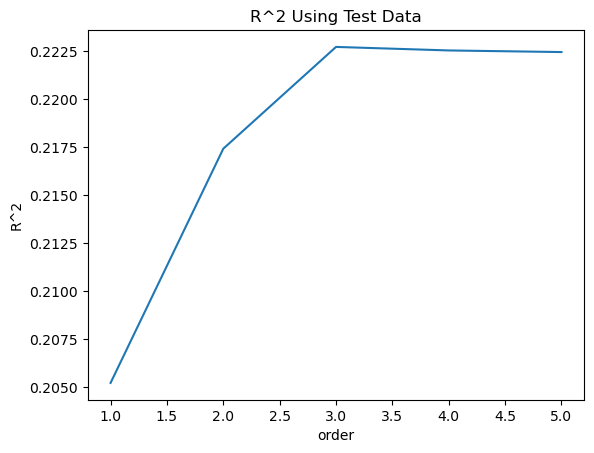

In [326]:
Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    X_train_pr = pr.fit_transform(X_train[[variable]])
    X_test_pr = pr.transform(X_test[[variable]])
    model.fit(X_train_pr, y_train)
    Rsqu_test.append(model.score(X_test_pr,y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Le degré 3 est le plus optimal

test score: 0.22271324745409116
train score: 0.1826684187778984


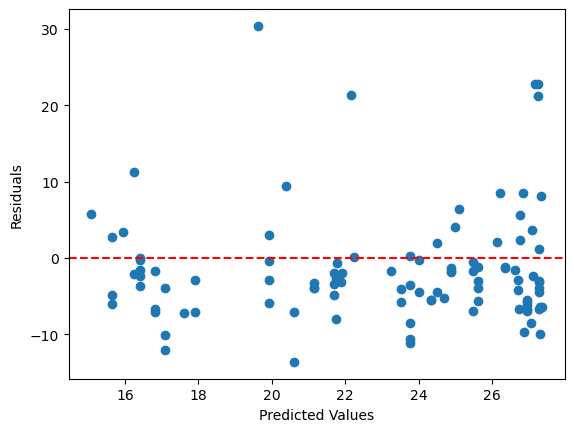

In [327]:
pr = PolynomialFeatures(degree=3)
X_train_pr = pr.fit_transform(X_train[[variable]])
X_test_pr = pr.transform(X_test[[variable]])
model.fit(X_train_pr,y_train)
y_pred = model.predict(X_test_pr)

print("test score:", model.score(X_test_pr, y_test))
print("train score:", model.score(X_train_pr, y_train))

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

<Axes: xlabel='MEDV', ylabel='Count'>

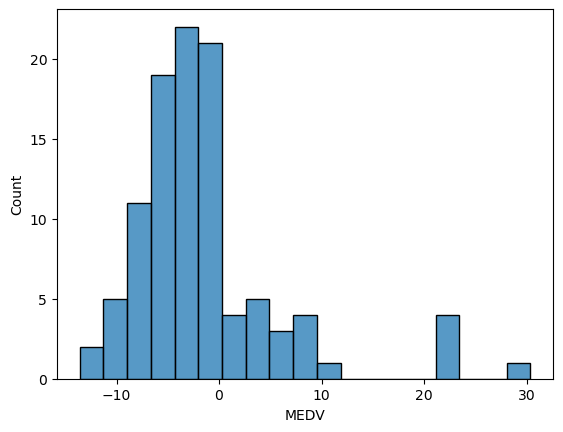

In [328]:
sns.histplot(residuals)

Les résidus ne sont pas normalement distribués. La transformation n'est pas arrivée à capter la non linéarité.

# RM

0.4267488483456362


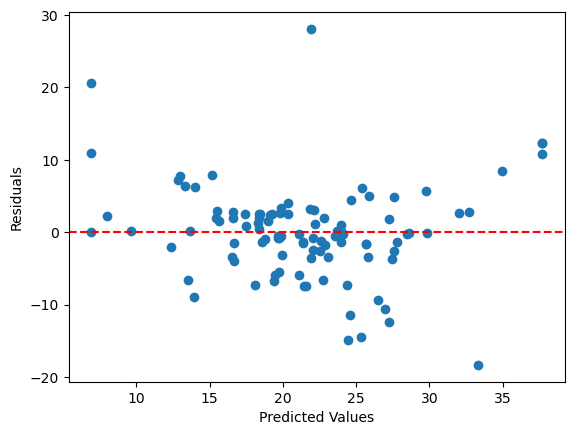

In [329]:
variable = 'RM'

X = X_train[[variable]]
y = y_train
model.fit(X, y)
y_pred = model.predict(X_test[[variable]])
print(r2_score(y_test,y_pred))
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

La relation est non linéaire

# Polynomial transformation

Text(0.5, 1.0, 'R^2 Using Test Data')

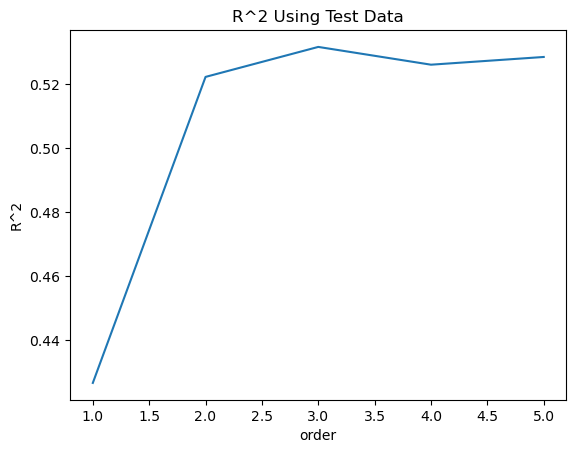

In [330]:
Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    X_train_pr = pr.fit_transform(X_train[[variable]])
    X_test_pr = pr.transform(X_test[[variable]])
    model.fit(X_train_pr, y_train)
    Rsqu_test.append(model.score(X_test_pr,y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Le degré 3 est le plus optimal

test score: 0.5316840250671209
train score: 0.5907536367781343


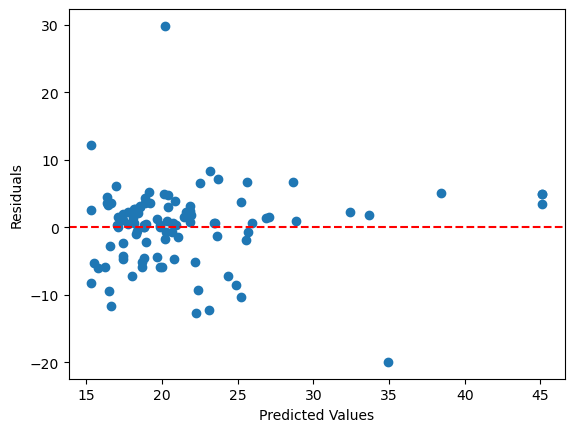

In [335]:
pr = PolynomialFeatures(degree=3)
X_train_pr = pr.fit_transform(X_train[[variable]])
X_test_pr = pr.transform(X_test[[variable]])
model.fit(X_train_pr,y_train)
y_pred = model.predict(X_test_pr)

print("test score:", model.score(X_test_pr, y_test))
print("train score:", model.score(X_train_pr, y_train))

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

<Axes: xlabel='MEDV', ylabel='Count'>

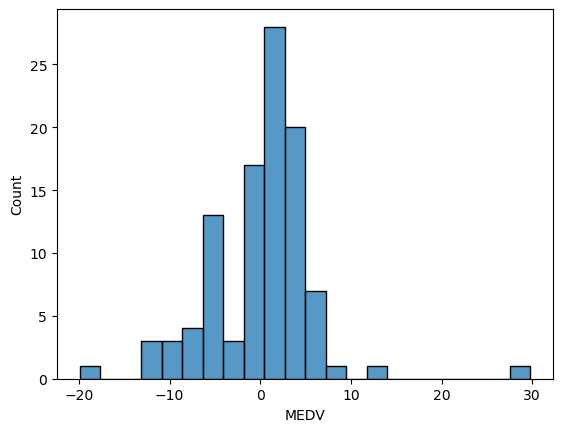

In [336]:
sns.histplot(residuals)

<Axes: ylabel='Density'>

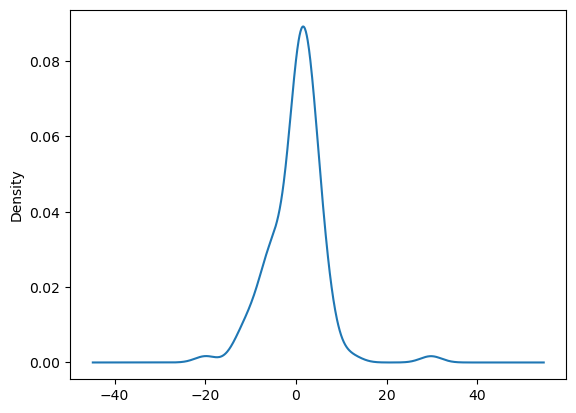

In [337]:
residuals.plot(kind="density")

Les résidus sont distribués plutôt normalement. La transformation polynomiale a aidé à capturer la non-linéarité

# AGE

0.24001491237901984


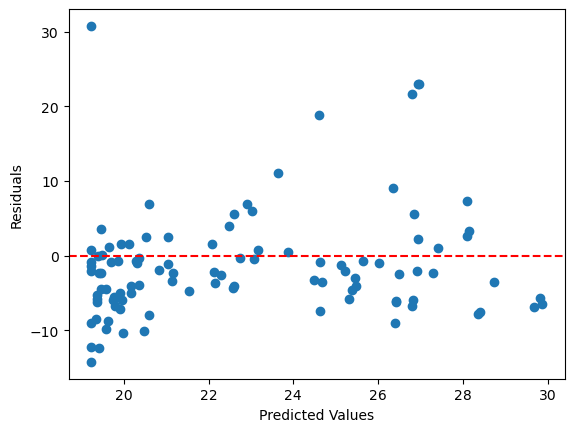

In [338]:
variable = 'AGE'

X = X_train[[variable]]
y = y_train
model.fit(X, y)
y_pred = model.predict(X_test[[variable]])
print(r2_score(y_test,y_pred))
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

La relation n'est pas linéaire

# Polynomial transformation

Text(0.5, 1.0, 'R^2 Using Test Data')

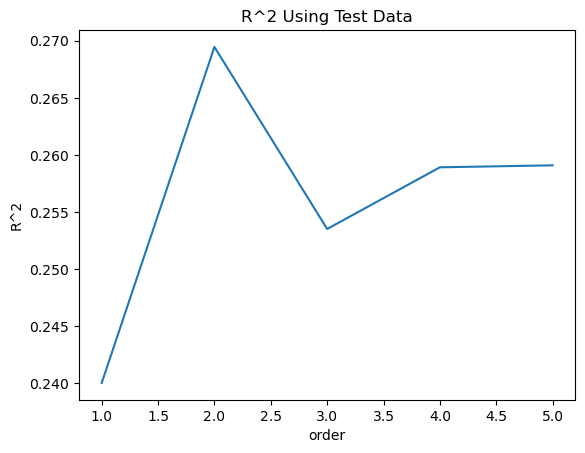

In [339]:
Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    X_train_pr = pr.fit_transform(X_train[[variable]])
    X_test_pr = pr.transform(X_test[[variable]])
    model.fit(X_train_pr, y_train)
    Rsqu_test.append(model.score(X_test_pr,y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Le degré 2 est le plus optimal

test score: 0.2694586798169898
train score: 0.12490219363108457


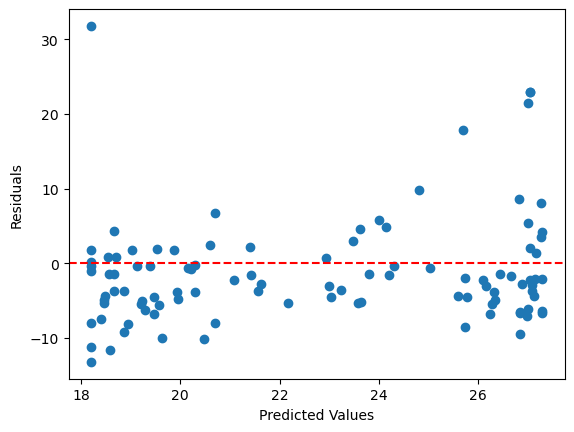

In [340]:
pr = PolynomialFeatures(degree=2)
X_train_pr = pr.fit_transform(X_train[[variable]])
X_test_pr = pr.transform(X_test[[variable]])
model.fit(X_train_pr,y_train)
y_pred = model.predict(X_test_pr)

print("test score:", model.score(X_test_pr, y_test))
print("train score:", model.score(X_train_pr, y_train))

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

<Axes: xlabel='MEDV', ylabel='Count'>

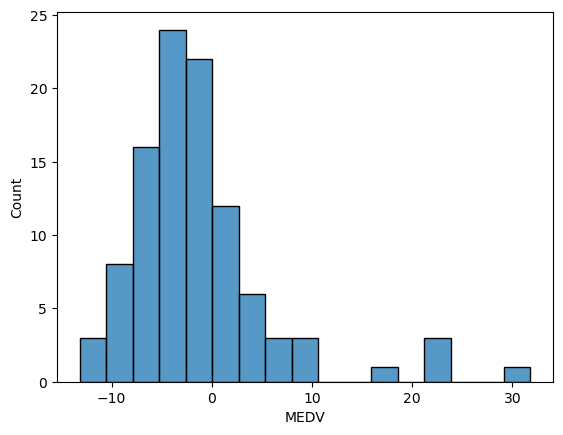

In [341]:
sns.histplot(residuals)

Les résidus ne sont pas normalement distribués. La transformation n'est pas arrivée à capter la non linéarité.

# DIS

0.07723476180422517


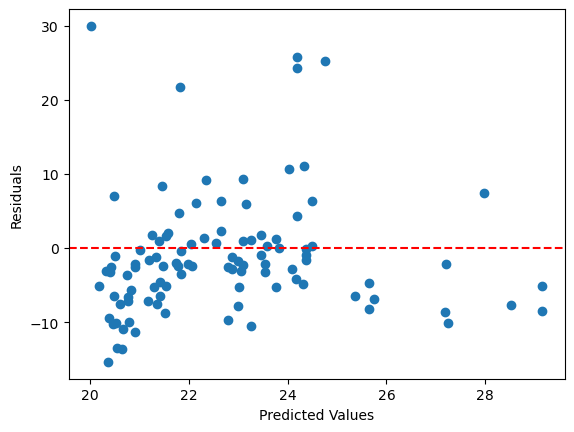

In [342]:
variable = 'DIS'

X = X_train[[variable]]
y = y_train
model.fit(X, y)
y_pred = model.predict(X_test[[variable]])
print(r2_score(y_test,y_pred))
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Relation non linéaire

# Polynomial transformation

Text(0.5, 1.0, 'R^2 Using Test Data')

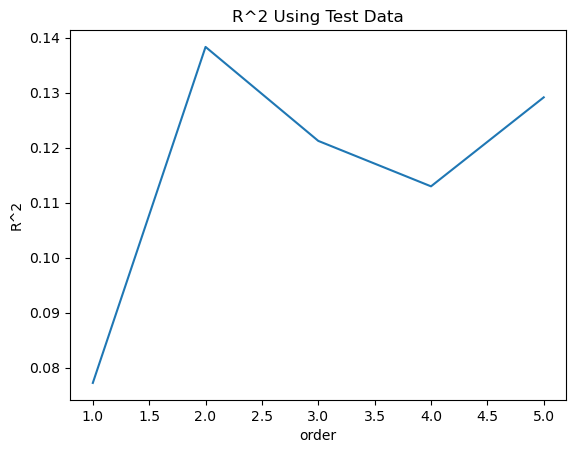

In [343]:
Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    X_train_pr = pr.fit_transform(X_train[[variable]])
    X_test_pr = pr.transform(X_test[[variable]])
    model.fit(X_train_pr, y_train)
    Rsqu_test.append(model.score(X_test_pr,y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Le degré 2 est le plus optimal

test score: 0.13832250530116086
train score: 0.08530540819114929


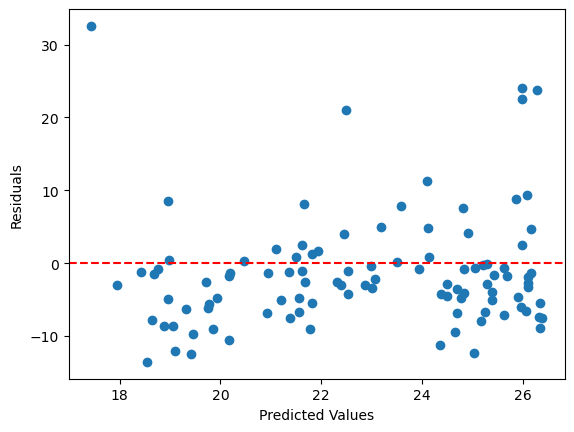

In [344]:
pr = PolynomialFeatures(degree=2)
X_train_pr = pr.fit_transform(X_train[[variable]])
X_test_pr = pr.transform(X_test[[variable]])
model.fit(X_train_pr,y_train)
y_pred = model.predict(X_test_pr)

print("test score:", model.score(X_test_pr, y_test))
print("train score:", model.score(X_train_pr, y_train))

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

<Axes: xlabel='MEDV', ylabel='Count'>

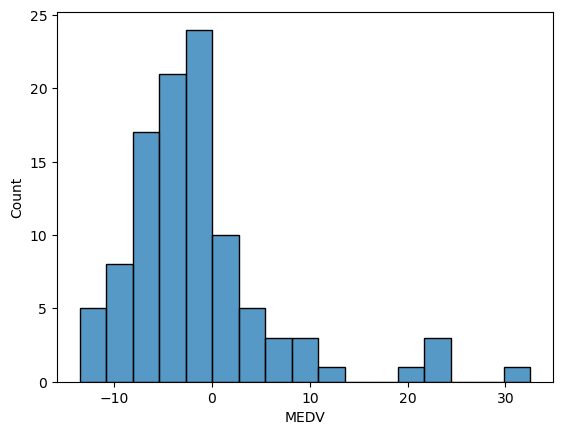

In [345]:
sns.histplot(residuals)

Les résidus ne sont pas normalement distribués. La transformation n'est pas arrivée à capter la non linéarité.

# TAX

0.2413042465957823


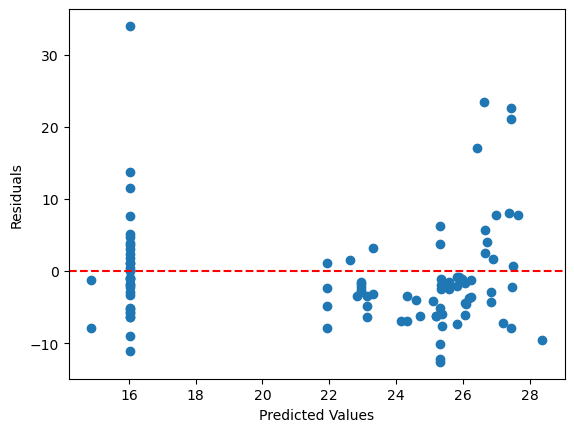

In [346]:
variable = 'TAX'

X = X_train[[variable]]
y = y_train
model.fit(X, y)
y_pred = model.predict(X_test[[variable]])
print(r2_score(y_test,y_pred))
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Relation non linéaire

# Polynomial transformation

Text(0.5, 1.0, 'R^2 Using Test Data')

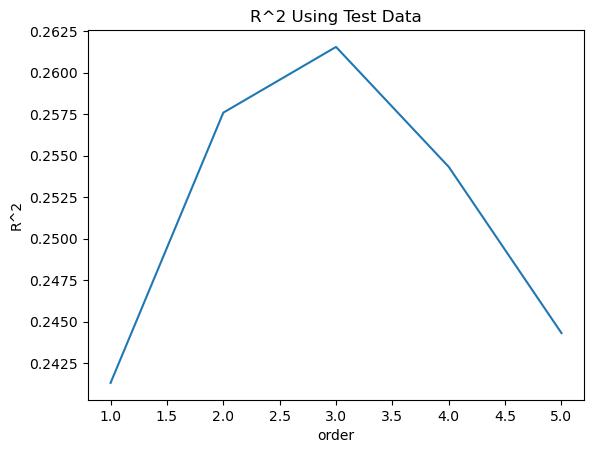

In [347]:
Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    X_train_pr = pr.fit_transform(X_train[[variable]])
    X_test_pr = pr.transform(X_test[[variable]])
    model.fit(X_train_pr, y_train)
    Rsqu_test.append(model.score(X_test_pr,y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Le degré 3 est le plus optimal

test score: 0.26154990558672686
train score: 0.21328645000879853


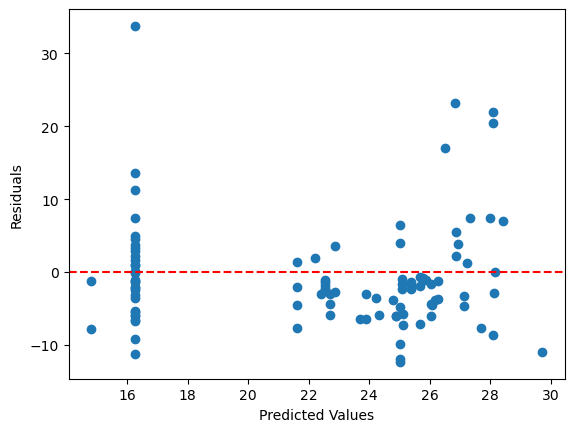

In [348]:
pr = PolynomialFeatures(degree=3)
X_train_pr = pr.fit_transform(X_train[[variable]])
X_test_pr = pr.transform(X_test[[variable]])
model.fit(X_train_pr,y_train)
y_pred = model.predict(X_test_pr)

print("test score:", model.score(X_test_pr, y_test))
print("train score:", model.score(X_train_pr, y_train))

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

<Axes: xlabel='MEDV', ylabel='Count'>

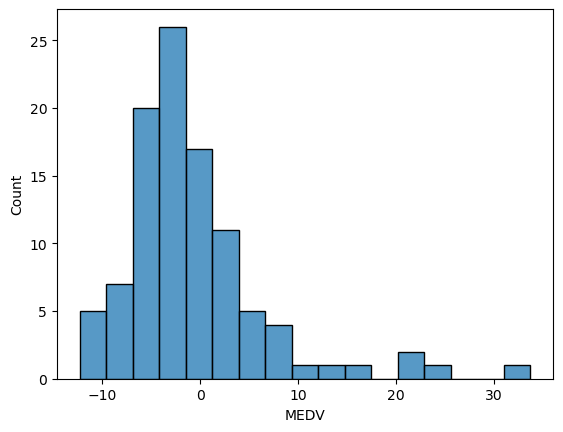

In [349]:
sns.histplot(residuals)

Les résidus ne sont pas normalement distribués. La transformation n'est pas arrivée à capter la non linéarité.

# PTRATIO

0.3186467557827527


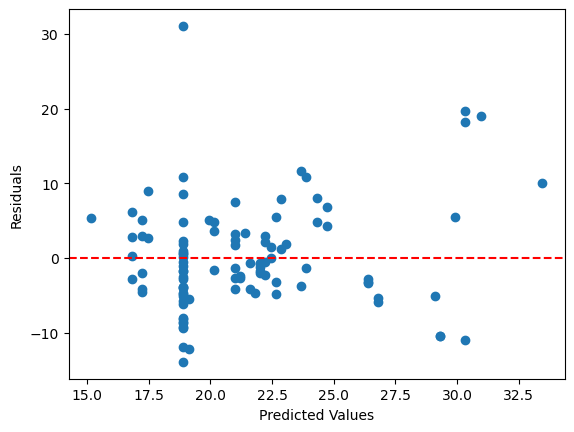

In [350]:
variable = 'PTRATIO'

X = X_train[[variable]]
y = y_train
model.fit(X, y)
y_pred = model.predict(X_test[[variable]])
print(r2_score(y_test,y_pred))
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

<Axes: xlabel='MEDV', ylabel='Count'>

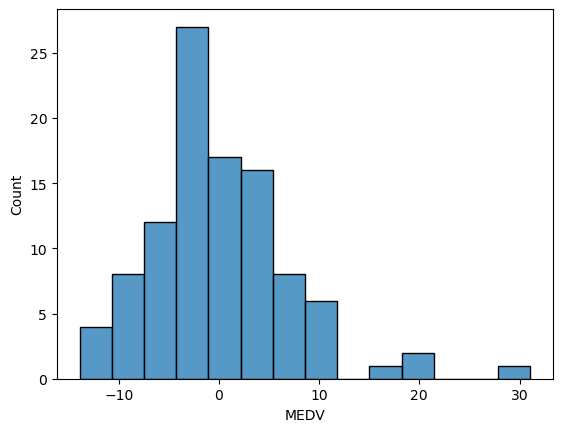

In [351]:
sns.histplot(residuals)

Doute sur la relation linéaire?

# Polynomial transformation

Text(0.5, 1.0, 'R^2 Using Test Data')

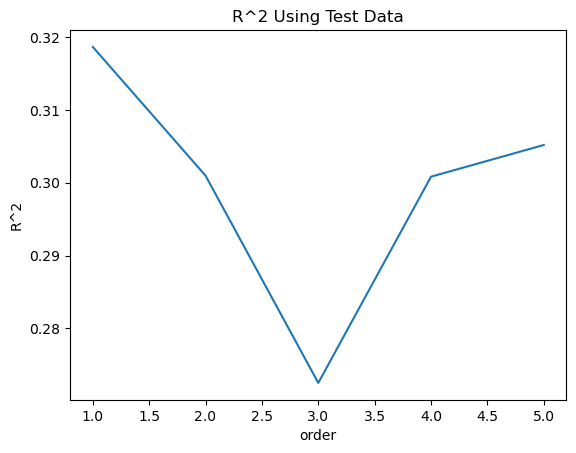

In [352]:
Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    X_train_pr = pr.fit_transform(X_train[[variable]])
    X_test_pr = pr.transform(X_test[[variable]])
    model.fit(X_train_pr, y_train)
    Rsqu_test.append(model.score(X_test_pr,y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Le degré optimal est de 1 ce qui démontre que la relation est linéaire donc pas besoin de tranformation polynomiale

# LSTAT

0.5583363072019827


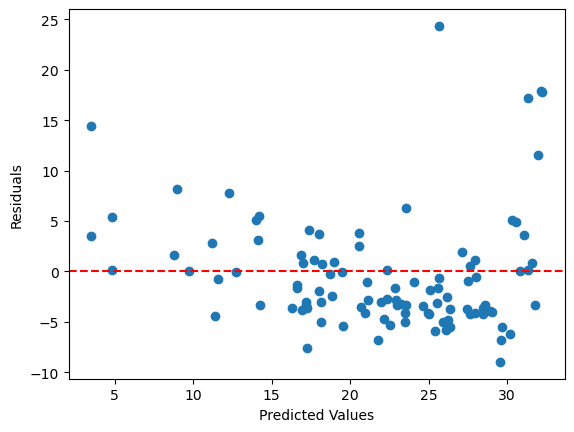

In [353]:
variable = 'LSTAT'

X = X_train[[variable]]
y = y_train
model.fit(X, y)
y_pred = model.predict(X_test[[variable]])
print(r2_score(y_test,y_pred))
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

La relation n'est pas linéaire

# Polynomial transformation

Text(0.5, 1.0, 'R^2 Using Test Data')

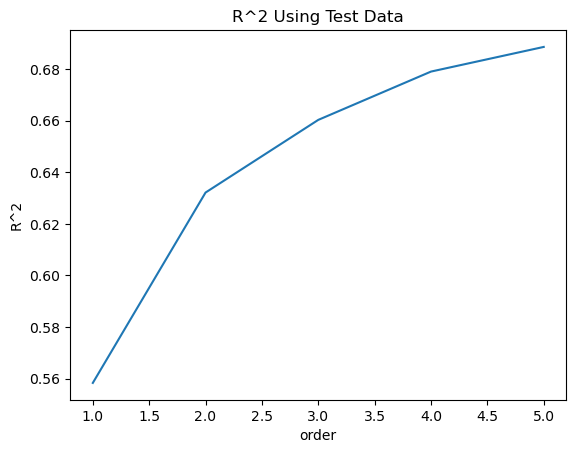

In [354]:
Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    X_train_pr = pr.fit_transform(X_train[[variable]])
    X_test_pr = pr.transform(X_test[[variable]])
    model.fit(X_train_pr, y_train)
    Rsqu_test.append(model.score(X_test_pr,y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Le degré 5 est le plus optimal

test score: 0.6885362138311677
train score: 0.6799229055236317


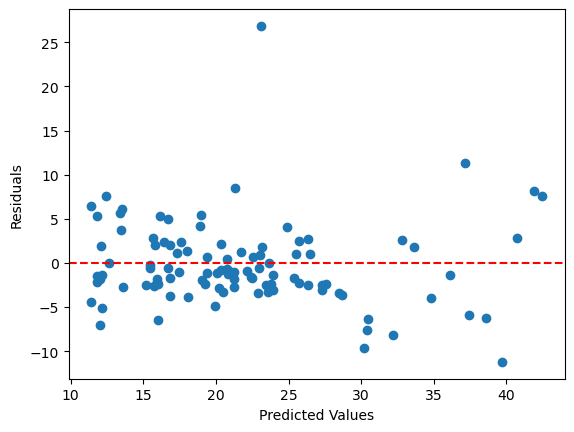

In [355]:
pr = PolynomialFeatures(degree=5)
X_train_pr = pr.fit_transform(X_train[[variable]])
X_test_pr = pr.transform(X_test[[variable]])
model.fit(X_train_pr,y_train)
y_pred = model.predict(X_test_pr)

print("test score:", model.score(X_test_pr, y_test))
print("train score:", model.score(X_train_pr, y_train))

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

<Axes: xlabel='MEDV', ylabel='Count'>

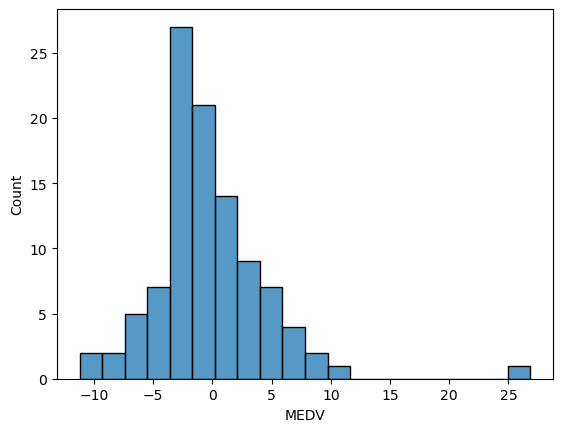

In [356]:
sns.histplot(residuals)

<Axes: ylabel='Density'>

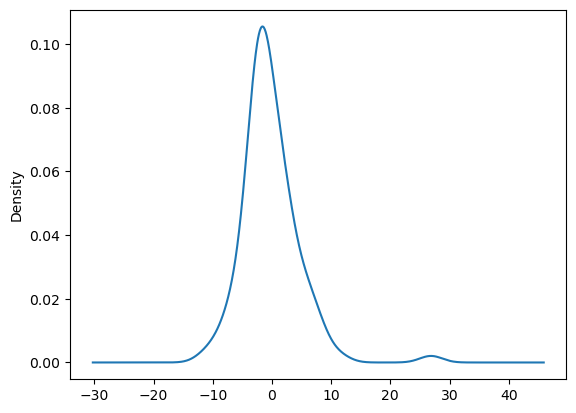

In [357]:
residuals.plot(kind="density")

Les résidus sont normalement distribués. La transformation est arrivée à capter la non linéarité.

# Variables sélectionnées :

INDUS
RM
PTRATIO
LSTAT

In [358]:
X = df[["INDUS", "RM", "PTRATIO", "LSTAT"]]
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [359]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

In [360]:
lr = LinearRegression()
lr.fit(X_scaled,y_train)
lr.score(X_scaled,y_train)

0.6862815416213853

In [361]:
y_train_pred = lr.predict(X_scaled)
y_predicted = lr.predict(X_test_scaled)

# Calcul des scores R-squared pour l'ensemble d'entraînement et de test
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_predicted)

print(f"R-squared sur l'ensemble d'entraînement : {r2_train}")
print(f"R-squared sur l'ensemble de test : {r2_test}")

R-squared sur l'ensemble d'entraînement : 0.6862815416213853
R-squared sur l'ensemble de test : 0.6516261522835036


In [362]:
mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

print('mse =', mse)
print('rmse = ', np.sqrt(mse))
print('mae =', mae)

mse = 25.54757220716892
rmse =  5.054460624752053
mae = 3.299675044648429


# Polynomial transformation

In [363]:
Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    X_train_pr = pr.fit_transform(X_scaled)
    X_test_pr = pr.transform(X_test_scaled)
    lr.fit(X_train_pr, y_train)
    Rsqu_test.append(lr.score(X_test_pr,y_test))

Text(0.5, 1.0, 'R^2 Using Test Data')

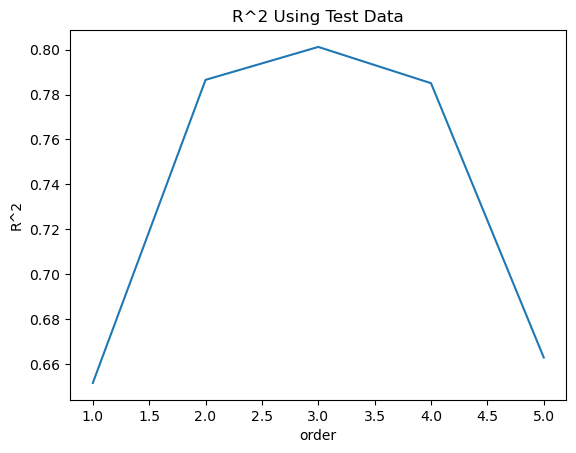

In [364]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Le degré 3 est le plus optimal

In [366]:
pr = PolynomialFeatures(degree=3)
X_train_pr = pr.fit_transform(X_scaled)
X_test_pr = pr.transform(X_test_scaled)
lr.fit(X_train_pr,y_train)
y_hat_train = lr.predict(X_train_pr)
y_hat = lr.predict(X_test_pr)
print("train score: ", r2_score(y_train,y_hat_train))
print("test score: ", r2_score(y_test,y_hat))

train score:  0.8710879458182209
test score:  0.8012138260048179


In [367]:
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)

print('mse =', mse)
print('rmse = ', np.sqrt(mse))
print('mae =', mae)

mse = 14.57774217903291
rmse =  3.8180809550129906
mae = 2.5400106514049363


# Ridge

In [368]:
from sklearn.linear_model import Ridge
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RM = Ridge(alpha=alpha) 
    RM.fit(X_train_pr, y_train)
    test_score, train_score = RM.score(X_test_pr, y_test), RM.score(X_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:07<00:00, 128.97it/s, Test Score=0.803, Train Score=0.871]


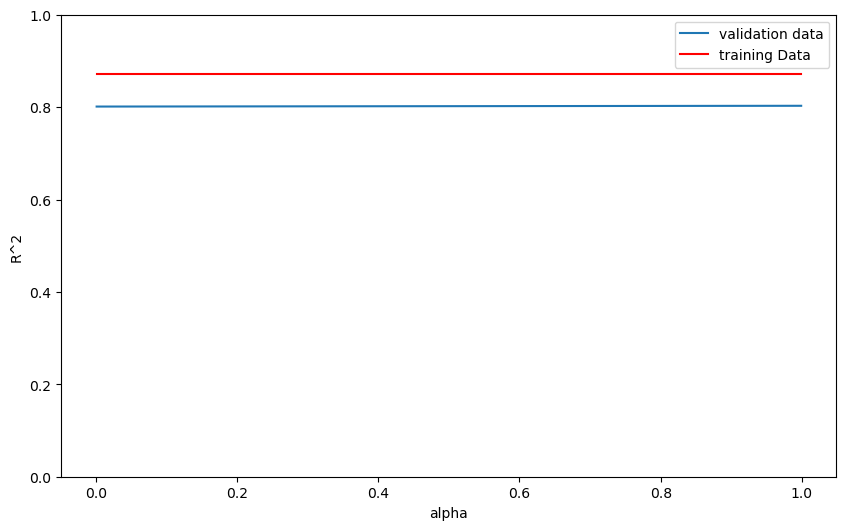

In [369]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

In [370]:
index_max = np.argmax(Rsqu_test)

alpha_optimal = Alpha[index_max]

print(f"Alpha optimal : {alpha_optimal}")

Alpha optimal : 0.999


In [371]:
RM = Ridge(alpha=1)
RM.fit(X_train_pr,y_train)
y_hat = RM.predict(X_test_pr)
print(r2_score(y_test,y_hat))
print("test score:", RM.score(X_test_pr, y_test))
print("train score:", RM.score(X_train_pr, y_train))

0.8028879775225138
test score: 0.8028879775225138
train score: 0.8710032764535213


In [252]:
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)

print('mse =', mse)
print('rmse = ', np.sqrt(mse))
print('mae =', mae)

mse = 14.454970314656672
rmse =  3.8019692679789867
mae = 2.520084808414058


# Regression linéaire

train score : 0.6862815416213853

test score : 0.6516261522835036

# Regression linéaire avec transformation polynomiale

train score = 0.8710879458182209

test score = 0.8012138260048179

# Regression Ridge avec transformation polynomiale

train score: 0.8710032764535213

test score: 0.8028879775225138

La transformation polynomiale a ajouté une certaine complexité au modèle, ce qui lui a permis de mieux s'adapter aux données et d'améliorer les performances.
Les performances similaires entre la régression linéaire avec transformation polynomiale et la régression Ridge suggère que la transformation polynomiale a déjà permis de gérer efficacement le surajustement potentiel dans le modèle de régression linéaire simple. La régression Ridge aurait pu être utilisée pour régulariser le modèle et réduire le surajustement si nécessaire, mais dans ce cas, il semble que la transformation polynomiale ait suffi à améliorer les performances du modèle.

Cela suggère que la sélection de variables avec une transformation polynomiale peut être une approche plus efficace, car elle permet de réduire la complexité du modèle tout en maintenant des performances similaires. Cela peut conduire à un modèle plus interprétable et généralisable.

Le modèle avec les variables sélectionnées statistiquement est plus performant avec un score de test de 0.83 contre 0.82 pour le modèle avec sélection des coefficients les plus grand et 0.80 avec les variables sélectionnées grâce aux tranformations polynomiales et aux visualisations des résidus.

Les scores sont pratiquement similaires. Le dernier modèle arrive à généraliser pratiquement pareil avec moins de variables, 4 contre 8 pour le premier et 5 pour le deuxième.

# Cross Validation

In [372]:
from sklearn.model_selection import KFold

# Avec les variables sélectionnées grâce aux statistiques

In [373]:
k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=42)

validation_scores = []

X = df1.drop("MEDV", axis=1)
y = df1["MEDV"]

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    scaler = StandardScaler()
    X_scaled_train = scaler.fit_transform(X_train)
    X_scaled_val = scaler.transform(X_val)
    
    pr = PolynomialFeatures(degree=2)
    X_train_pr = pr.fit_transform(X_scaled_train)
    X_val_pr = pr.transform(X_scaled_val)
    
    RM = Ridge(alpha=1)
    RM.fit(X_train_pr,y_train)
    
    val_score = RM.score(X_val_pr, y_val)
    validation_scores.append(val_score)

# Moyenne des scores de validation
mean_validation_score = np.mean(validation_scores)
print("Mean validation score:", mean_validation_score)

Mean validation score: 0.825594712976024


In [234]:
validation_scores

[0.8229785857691921,
 0.8263174912258111,
 0.8285990052856697,
 0.9046773326042445,
 0.7454011499952028]

# Avec les variables sélectionnées grâce aux coefficients

In [374]:
k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=42)

validation_scores = []

X = df2.drop("MEDV", axis=1)
y = df2["MEDV"]

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    scaler = StandardScaler()
    X_scaled_train = scaler.fit_transform(X_train)
    X_scaled_val = scaler.transform(X_val)
    
    pr = PolynomialFeatures(degree=2)
    X_train_pr = pr.fit_transform(X_scaled_train)
    X_val_pr = pr.transform(X_scaled_val)
    
    RM = Ridge(alpha=1)
    RM.fit(X_train_pr,y_train)
    
    val_score = RM.score(X_val_pr, y_val)
    validation_scores.append(val_score)

# Moyenne des scores de validation
mean_validation_score = np.mean(validation_scores)
print("Mean validation score:", mean_validation_score)

Mean validation score: 0.8239421952367693


In [375]:
validation_scores

[0.8175447316080836,
 0.8340221947612338,
 0.8061324699225128,
 0.8881710470410217,
 0.773840532850994]

# Avec les variables sélectionnées grâce à la transformation polynomiale et des résidus

In [376]:
k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=42)

validation_scores = []

X = df[["INDUS", "RM", "PTRATIO", "LSTAT"]]
y = df['MEDV']

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    scaler = StandardScaler()
    X_scaled_train = scaler.fit_transform(X_train)
    X_scaled_val = scaler.transform(X_val)
    
    pr = PolynomialFeatures(degree=3)
    X_train_pr = pr.fit_transform(X_scaled_train)
    X_val_pr = pr.transform(X_scaled_val)
    
    RM = Ridge(alpha=1)
    RM.fit(X_train_pr,y_train)
    
    val_score = RM.score(X_val_pr, y_val)
    validation_scores.append(val_score)

# Moyenne des scores de validation
mean_validation_score = np.mean(validation_scores)
print("Mean validation score:", mean_validation_score)

Mean validation score: 0.829526024232657


In [377]:
validation_scores

[0.8028879775225145,
 0.804674815502594,
 0.8522517839532576,
 0.8986055220349578,
 0.7892100221499607]

Le KFold nous montre que le modèle avec les variables sélectionnées grâce aux coefficients a le score moyen le plus élevé.

# Summary

"RM", "LSTAT", "INDUS", "NOX", "AGE", "DIS", "TAX","PTRATIO","MEDV"

Score R² sur les données d'entraînement : 0.7188037089730239
Score R² sur les données de test : 0.6450890652196315

poly : 
test score: 0.822978585769191
train score: 0.8818451720272897

ridge : 
test score: 0.822978585769191
train score: 0.8818451720272897

Mean validation score: 0.825594712976024


coef : "LSTAT", "RM", "DIS", "PTRATIO", "NOX","MEDV"

Score R² sur les données d'entraînement : 0.7173965013003452
Score R² sur les données de test : 0.678537930110665

poly : 
test score: 0.8169977814527828
train score: 0.8499301800661438

ridge : 
test score: 0.8175447316080838
train score: 0.8499043749394006

Mean validation score: 0.8239421952367693


Variable avec transformation poly et résidus:
"INDUS", "RM", "PTRATIO", "LSTAT"

Score R² sur l'ensemble d'entraînement : 0.6862815416213853
Score R² sur l'ensemble de test : 0.6516261522835036

poly:
train score:  0.8710879458182209
test score:  0.8012138260048179

ridge:
test score: 0.8028879775225138
train score: 0.8710032764535213

Mean validation score: 0.829526024232657